# **Análise de Dados das Interrupções no Sistema Elétrico de Distribuição no Nordeste em 2023**

## 1. Introdução e Objetivo do Projeto

Este projeto tem como objetivo analisar as interrupções de energia elétrica na rede de distribuição do Nordeste do Brasil ao longo de 2023. O objetivo principal é analisar a frequência,  a duração, a quantidade de consumidores afetados dessas interrupções, identificar os fatores que contribuíram para essas ocorrências e explorar possíveis correlações com fatores externos, como os dados mensais de chuva na região. Utilizando bases de dados públicas disponibilizadas pela ANEEL (Agência Nacional de Energia Elétrica) e pelo INMET (Instituto Nacional de Meteorologia), foi realizado uma análise exploratória abrangente dos dados utilizando a linguagem de programação Python para a extração,tratamento e análise.

## 2. Visão Geral 

Atualmente o acesso à energia elétrica está relacionada diretamente com qualidade de vida e desenvolvimento da sociedade. Para isso, garantir que o fornecimento de serviço seja confiável, de qualidade e disponível 100% do tempo é o principal objetivo de uma concessionária de distribuição de energia elétrica. Porém, por se tratar de um serviço essencial e que exige uma estrutura complexa e com muitas etapas, entender e evitar qualquer tipo de interrupção no fornecimento é algo extremamente importante para um serviço de qualidade.

Neste sentido, o órgão regulador do sistema elétrico, ANEEL, impõe às concessionárias de energia elétrica regras e procedimentos para que o fornecimento de energia seja confiável, seguro e de qualidade. Por sua vez, as distribuidoras de energia elétrica tentam a todo custo evitar que haja uma interrupção no fornecimento de energia para não serem penalizadas pela regulação. 

Garantir um fornecimento confiável e contínuo é o principal objetivo das concessionárias de energia. Para evitar penalidades da ANEEL, é crucial entender e prevenir interrupções no serviço. Analisar as principais causas dessas interrupções ajuda a melhorar os indicadores de qualidade de energia e protege a rede elétrica, beneficiando tanto os consumidores quanto as distribuidoras.


## 3. Entendimento do Negócio 

O sistema de distribuição de energia elétrica é responsável por captar a energia elétrica do setor de transmissão e transferi-la com a tensão regulada para os consumidores finais, sejam eles empresas ou residências. Este segmento é crucial para a entrega de energia e a cobrança proporcional ao consumo mensal dos usuários (KAGAN, 2005). A estrutura de distribuição inclui fios condutores, equipamentos de proteção, medição e controle, e transformadores, formando uma rede ramificada com equipamentos de menor escala comparados ao sistema de transmissão.

**Estrutura e Configuração da Rede de Distribuição**

As redes de distribuição são subdivididas em três tipos, dependendo da tensão elétrica:

- Redes de Alta Tensão (Subtransmissão): Transportam tensões de 138kV, reduzindo para até 34,5kV.

- Redes de Média Tensão (Distribuição Primária): Interligam a subtransmissão e a baixa tensão.

- Redes de Baixa Tensão (Distribuição Secundária): Operam entre 127V e 380V, conectando-se diretamente às residências (KAGAN, 2005).

As redes de distribuição primária podem ser aéreas ou subterrâneas. As redes aéreas são mais comuns devido ao custo mais baixo, enquanto as redes subterrâneas são usadas em áreas de alta densidade de carga ou com restrições estéticas.

**Regulação e Qualidade do Serviço**

Para assegurar a qualidade do fornecimento de energia elétrica, a ANEEL (Agência Nacional de Energia Elétrica) estabeleceu os Procedimentos de Distribuição de Energia Elétrica (PRODIST), que padronizam as atividades de distribuição. O módulo 8 do PRODIST é especialmente relevante, pois aborda a qualidade do serviço e da energia elétrica (ANEEL, 2022). A ANEEL utiliza diversos indicadores para monitorar a qualidade do serviço, incluindo a continuidade do fornecimento. Esses indicadores são públicos e permitem a avaliação do desempenho das distribuidoras em diferentes regiões.

**Indicadores de Continuidade**

Os indicadores de continuidade são fundamentais para medir a qualidade do serviço de distribuição. Eles avaliam a duração e a frequência das interrupções, tanto em nível individual quanto coletivo. Interrupções com duração superior a três minutos são consideradas significativas e impactam negativamente os indicadores. A ANEEL estabelece que o Consumidor Hora interrompido  (CHI) é calculado com base na Duração de Interrupção Individual por Unidade Consumidora (DIC), expresso em horas (ANEEL, 2021) ou de maneira mais clara multiplicando a quantidade de clientes(consumidores) interrompidos pela duração da interrupção.

**Importância da Minimização de Interrupções**

Minimizar as interrupções é crucial para garantir a qualidade do serviço de distribuição. Menor duração, menor frequência de interrupções e um número reduzido de clientes afetados resultam em melhores classificações nos indicadores de continuidade. Essa prática não só garante a satisfação dos consumidores, mas também evita penalidades regulatórias, como multas e compensações financeiras aos consumidores afetados. Ao longo do projeto vamos nos referir as interupções tambem chamando-a de ocorrências.


**Tipos de Análise Realizados:**
- Análise exploratoria dos dados
- Análise das sazonalidade
- Analise da relação entre variavies quantitavias e categoricas

**Principais Indicadores Chave de Desempenho:**
- Número de Ocorrencias ou Interrupções
- Duração das Interrupções
- Quantidade de Consumidores Atingidos
- Valor do CHI (Consumidor Hora Interrompido)

## 4. Importando os pacotes, datasets necessários e configurações

### 4.1 Bibliotecas 

In [1]:
# Bibliotecas de manipulação e tratamento de dados
import pandas as pd
import numpy as np
from unidecode import unidecode
# Bibliotecas de visualização 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
# Bibliotecas de Otimização e configurações
from dtype_diet import report_on_dataframe, optimize_dtypes
import warnings


### 4.2 Configurações

In [81]:
# Desabilitar todos os warnings
warnings.filterwarnings("ignore")

### Comandos do Pandas
pd.set_option('display.max_columns', None)



### 4.3 Funções 

In [3]:
# Definindo as datas de início das estações para o ano de 2023
verao_inicio = pd.Timestamp(year=2023, month=12, day=21)
outono_inicio = pd.Timestamp(year=2023, month=3, day=20)
inverno_inicio = pd.Timestamp(year=2023, month=6, day=21)
primavera_inicio = pd.Timestamp(year=2023, month=9, day=23)

# Mapeando nome dos meses para visualização
nomes_meses = {'2023-01': 'Janeiro','2023-02': 'Fevereiro','2023-03': 'Março','2023-04': 'Abril','2023-05': 'Maio','2023-06': 'Junho',
            '2023-07': 'Julho','2023-08': 'Agosto','2023-09': 'Setembro','2023-10': 'Outubro','2023-11': 'Novembro','2023-12': 'Dezembro'
}

# criando um função de costumização para usar nos graficos verticais
def grafico_vertical(ax,valor,titulo):
    """Costumiza o gráfico cujo as variaveis estão no eixo y 
    Args:
        ax (_type_): gráfico para costumizar
        valor (_type_): eixo y do dados do gráfico
        titulo (_type_): Título do Gráfico
    """
    # Removendo a caixa ao redor do gráfico
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    # Ajustando a altura do eixo y
    ax.set_ylim(0, valor.max() * 1.2)  # aumenta o limite superior e inferior em 10%
    #removendo o tick do eixo x
    ax.xaxis.set_ticks_position('none')
    # Removendo o label do eixo y
    ax.set_ylabel('',fontsize=10)
    # Removendo o label do eixo x
    ax.set_xlabel('',fontsize=10)
    # Removendo os valores do eixo y
    ax.yaxis.set_ticks([])  # Remove as marcações do eixo y
    ax.yaxis.set_ticklabels([])  # Remove os rótulos do eixo y
    # Ajustando o tamanho das fontes dos ticks
    ax.tick_params(axis='both', which='major', labelsize=10)
    # Definindo o título do gráfico em negrito e tamanho 12
    ax.set_title(titulo, fontweight='bold', fontsize=12)
    # ajustando as porporções
    plt.tight_layout()

# criando um função de costumização para usar nos graficos horizontais
def grafico_horizontal(ax,valor,titulo):
    """Costumiza o gráfico cujo as variaveis estão no eixo x
    Args:
        ax (Grafico): gráfico para costumizar
        valor (series): eixo x do dados do gráfico
        titulo (str): Título do Gráfico
    """
    # Removendo a caixa ao redor do gráfico
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    # Ajustando a altura do eixo y
    ax.set_xlim(0, valor.max() * 1.2)  # aumenta o limite superior em 10%
    #removendo o tick do eixo y
    ax.yaxis.set_ticks_position('none')
    # Removendo o label do eixo y
    ax.set_ylabel('',fontsize=10)
    # Removendo o label do eixo x
    ax.set_xlabel('',fontsize=10)
    # Removendo os valores do eixo y
    ax.xaxis.set_ticks([])  # Remove as marcações do eixo x
    ax.xaxis.set_ticklabels([])  # Remove os rótulos do eixo x
    # Ajustando o tamanho das fontes dos ticks
    ax.tick_params(axis='both', which='major', labelsize=10)
    # Definindo o título do gráfico em negrito e tamanho 12
    ax.set_title(titulo, fontweight='bold', fontsize=12)
    # ajustando as porporções
    plt.tight_layout()

def informacoes(x,nome):
    # Linhas e Colunas do Dataframe 
    print(f" O DataFrame {nome} possui {x.shape[0]} linhas e {x.shape[1]}  colunas.")
    # Dados duplicados
    valores_duplicados = len(x[x.duplicated()])
    print(f" O DataFrame {nome} {valores_duplicados} linhas com valores duplicados.")
    # Valores Nulos 
    valores_nulos = x.isna().any(axis=1).sum()
    print(f" O DataFrame {nome} possui {valores_nulos} linhas com valores nulos.")
    # Tipos de Colunas 
    numerics = ["int16","int32","int64","float16","float32","float64"]
    numericas = x.select_dtypes(include = numerics)
    categoricas = x.select_dtypes(include = "category")
    datas = x.select_dtypes(include = ["datetime","datetime64"])
    print(
        f" O DataFrame {nome} possui {numericas.shape[1]} colunas numéricas e {categoricas.shape[1]} colunas categoricas e {datas.shape[1]} do tipo data.")

# Função para determinar a estação do ano
def determinar_estacao(data):
    if outono_inicio <= data < inverno_inicio:
        return 'Outono'
    elif inverno_inicio <= data < primavera_inicio:
        return 'Inverno'
    elif primavera_inicio <= data < verao_inicio:
        return 'Primavera'
    else:
        return 'Verão'
    
# Função para adicionar rótulos de dados
    """Esta função cria o rotulo de dados para graficos de linha
        Args:
        ax (Axes): gráfico para costumizar
        data (DataFrame or Series): eixo x do dados do gráfico
        y_col (Series): Título do Gráfico
    """
def rotulo_linhas(ax, data, decimal_places=1):
    for x, y in zip(data.index.astype(str), data.values):
        label = f'{y:.{decimal_places}f}'
        ax.annotate(label, (x, y), textcoords="offset points", xytext=(0, 8), ha='center')

# criando rotulo de dados no grafico de barra
def rotulo_barra(ax, decimals=0):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.{decimals}f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10),
                    textcoords='offset points')

# função para colocar nome dos meses no eixo x para o grafico de meses
def nome_meses(ax,dados):
    """Esta função coloca o nome dos meses no eixo X para graficos com o meses numerico
    Args:
        ax (Axes): grafico para modificar o eixo x
        dados (Series): serie em pandas para que seja modificado para nome dos meses
    """
    ax.set_xticklabels([nomes_meses[label] for label in dados.index.astype(str)], rotation=0, ha='center')


### 4.4 Importando os Datasets

In [4]:
# Importando a base de dados de interrupções
df = pd.read_csv('interrupcoes-energia-eletrica-2023.csv',encoding = 'iso-8859-1', sep = ';')

In [5]:
# importando os dados coletados pelo Imet de preciptação(chuva) mensal em 2023
dados_chuva = pd.read_csv('DadosChuvaNordeste2023.csv',sep=';',index_col= False)

## 5. Tratamento e Limpeza dos Dados

Esta seção fornece uma visão sobre o tratamento e limpeza feita nos dados que estão sendo analisados.

<span style="font-size: 20px;">**Dicionário de Variáveis**</span>


<span style="font-size: 18px;">**Interrupções de Energia Elétrica nas Redes de Distribuição**</span>

- **`DatGeracaoConjuntoDados `**: 
  - **Descrição:** Data do processamento de carga automática no momento da geração para
publicação do conjunto de dados abertos.

- **`IdeConjuntoUnidadeConsumidora`**: 
  - **Descrição:** Código do conjunto da unidade consumidora

- **`DscAlimentadorSubestacao`**: 
  - **Descrição:** Descrição do alimentador da subestação. (Linha de transmissão que sai de
uma subestação de distribuição e segue para a distribuição de energia)

- **`DscSubestacaoDistribuicao`**: 
  - **Descrição:** Descrição da subestação de distribuição (Instalação elétrica de alta potência,
contendo equipamentos para transmissão e distribuição de energia elétrica,
além de equipamentos de proteção e controle)

- **`NumOrdemInterrupcao`**: 
  - **Descrição:** Descrição da Ordem de Interrupção. (Ofício ou normativo determinando
interrupções de energia)

- **`DscTipoInterrupcao`**: 
  - **Descrição:** Armazenar os tipos de interrupções existentes que se relacionarão com os
arquivos enviados pelos Agentes via DutoNet: 
    - Não Programada 
    - Programada 

- **`IdeMotivoExpurgo`**: 
  - **Descrição:** Identificador referenciando o Motivo do Expurgo. 
    - 0 - Não houve expurgo 
    - 1 - Falha nas instalações da unidade consumidora que não provoque interrupção em instalações de terceiros 
    - 2 - Interrupção decorrente de obras de interesse exclusivo do consumidor e que afete somente a unidade consumidora do mesmo 
    - 3 - Interrupção em situação de emergência 
    - 4 - Suspensão por inadimplemento do consumidor ou por deficiência técnica e/ou de segurança das instalações da unidade consumidora que não provoque interrupção em instalações de terceiros, previstas em regulamentação 
    - 5 - Vinculadas a programas de racionamento instituídos pela União
    - 6 - Ocorridas em dia crítico 
    - 7 - Oriundas de atuação de esquemas de alívio de carga solicitado pelo ONS 
    - 8 - Interrupção de origem externa ao sistema de distribuição

- **`DatInicioInterrupcao`**: 
  - **Descrição:** Data e hora do início da interrupção.

- **`DatFimInterrupcao`**: 
  - **Descrição:** Data e hora do reestabelecimento (Fim) da interrupção.

- **`FatGeradorInterrupcao`**: 
  - **Descrição:** Descrição do fato gerador da interrupção.

- **`NumNivelTensao`**: 
  - **Descrição:** Nível de tensão onde o fato gerador foi verificado.

- **`NumUnidadeConsumidora`**: 
  - **Descrição:** Número de unidades consumidoras atingidas.

- **`NumConsumidorConjunto`**: 
  - **Descrição:** Número de consumidores do conjunto.

- **`NumAno`**: 
  - **Descrição:** Ano de início da Interrupção.

- **`NomAgenteRegulado`**: 
  - **Descrição:** Nome do agente do setor regulado.

- **`SigAgente`**: 
  - **Descrição:** Sigla que abrevia o nome dos Agentes regulados pela ANEEL.

- **`NumCPFCNPJ`**: 
  - **Descrição:** Número do CNPJ ou CPF do agente fiscalizado.





### 5.1 Otimização da Base

In [6]:
# Verificando o tamanho da base de dados
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9149470 entries, 0 to 9149469
Data columns (total 18 columns):
 #   Column                         Dtype 
---  ------                         ----- 
 0   DatGeracaoConjuntoDados        object
 1   IdeConjuntoUnidadeConsumidora  int64 
 2   DscConjuntoUnidadeConsumidora  object
 3   DscAlimentadorSubestacao       object
 4   DscSubestacaoDistribuicao      object
 5   NumOrdemInterrupcao            object
 6   DscTipoInterrupcao             object
 7   IdeMotivoInterrupcao           int64 
 8   DatInicioInterrupcao           object
 9   DatFimInterrupcao              object
 10  DscFatoGeradorInterrupcao      object
 11  NumNivelTensao                 int64 
 12  NumUnidadeConsumidora          int64 
 13  NumConsumidorConjunto          int64 
 14  NumAno                         int64 
 15  NomAgenteRegulado              object
 16  SigAgente                      object
 17  NumCPFCNPJ                     int64 
dtypes: int64(7), object(11

In [7]:
# Reduzindo o tamanho da base de dados atraves do pacote dtype_diet
proposed_df = report_on_dataframe(df,unit = 'MB')
df = optimize_dtypes(df,proposed_df)
# Verificando o tamanho da base de dados
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9149470 entries, 0 to 9149469
Data columns (total 18 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   DatGeracaoConjuntoDados        category
 1   IdeConjuntoUnidadeConsumidora  int16   
 2   DscConjuntoUnidadeConsumidora  category
 3   DscAlimentadorSubestacao       category
 4   DscSubestacaoDistribuicao      category
 5   NumOrdemInterrupcao            object  
 6   DscTipoInterrupcao             category
 7   IdeMotivoInterrupcao           int8    
 8   DatInicioInterrupcao           category
 9   DatFimInterrupcao              category
 10  DscFatoGeradorInterrupcao      category
 11  NumNivelTensao                 int32   
 12  NumUnidadeConsumidora          int32   
 13  NumConsumidorConjunto          int32   
 14  NumAno                         int16   
 15  NomAgenteRegulado              category
 16  SigAgente                      category
 17  NumCPFCNPJ                 

In [8]:
# visualizando as 5 primeiras entradas do dataframe
df.head(5)

,DatGeracaoConjuntoDados,IdeConjuntoUnidadeConsumidora,DscConjuntoUnidadeConsumidora,DscAlimentadorSubestacao,DscSubestacaoDistribuicao,NumOrdemInterrupcao,DscTipoInterrupcao,IdeMotivoInterrupcao,DatInicioInterrupcao,DatFimInterrupcao,DscFatoGeradorInterrupcao,NumNivelTensao,NumUnidadeConsumidora,NumConsumidorConjunto,NumAno,NomAgenteRegulado,SigAgente,NumCPFCNPJ
0,2024-03-14,12596,São Francisco,01C2,SFR,2023-1,Não Programada,0,2023-01-01 00:16:34,2023-01-01 02:25:00,INTERNA - NAO PROGRAMADA - TERCEIROS - INTERFE...,13800,1,51157,2023,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,ELETROACRE,4065033000170
1,2024-03-14,12596,São Francisco,01C8,AAL,2023-20259,Não Programada,0,2023-02-17 18:23:00,2023-02-17 23:30:23,INTERNA - NAO PROGRAMADA - PROPRIAS DO SISTEMA...,127,1,51109,2023,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,ELETROACRE,4065033000170
2,2024-03-14,12595,Cruzeiro do Sul,01C5,CSU,2023-41060,Não Programada,0,2023-03-30 10:27:00,2023-03-30 12:46:50,INTERNA - NAO PROGRAMADA - PROPRIAS DO SISTEMA...,127,1,42815,2023,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,ELETROACRE,4065033000170
3,2024-03-14,12590,TAQUARI,01C1,CAP,2023-63897,Não Programada,0,2023-05-17 14:26:47,2023-05-17 23:42:05,INTERNA - NAO PROGRAMADA - PROPRIAS DO SISTEMA...,127,1,48107,2023,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,ELETROACRE,4065033000170
4,2024-03-14,12590,TAQUARI,09S2,TAQ,2023-85462,Não Programada,0,2023-07-17 06:01:00,2023-07-17 08:57:01,INTERNA - NAO PROGRAMADA - MEIO AMBIENTE - ANI...,127,2,48585,2023,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,ELETROACRE,4065033000170


In [9]:
# Verificando tamanho do Dataframe do Brasil
linhas,colunas = df.shape
print(f'O dataframe Brasil possui {linhas} linhas e {colunas} colunas')

O dataframe Brasil possui 9149470 linhas e 18 colunas


### 5.2 Removendo Colunas e dados desnecessários 

In [10]:
#Retirando Colunas que não serão usadas no projeto
retirar = ['DatGeracaoConjuntoDados','NumOrdemInterrupcao','NomAgenteRegulado','NumCPFCNPJ','DscTipoInterrupcao','NumAno','IdeConjuntoUnidadeConsumidora']
df = df.drop(retirar,axis=1)

In [11]:
# verificando as distribuidoras presentes no dataframe
df['SigAgente'].value_counts()

SigAgente
CEMIG-D                 1069408
COPEL-DIS                696833
Equatorial GO            654732
ENEL RJ                  416637
ENEL CE                  377402
CPFL-PAULISTA            366540
Equatorial PA            364993
LIGHT                    359480
ELETROPAULO              347988
Equatorial MA            337653
RGE SUL                  331385
EMT                      308164
CEEE-D                   290191
ELEKTRO                  250743
Equatorial PI            246058
COELBA                   236146
CELESC-DIS               220841
CELPE                    206251
EMS                      194214
ETO                      172924
EDP ES                   159907
AME                      156612
EPB                      143851
CERON                    143520
Equatorial AL            139755
EDP SP                   122608
ESS                      114188
CEBDIS                   107800
CPFL- PIRATININGA        104697
COSERN                    91048
ELETROACRE                7632

In [12]:
# criando uma lista com as distribuidoras do nordeste
nordeste = ['ENEL CE','Equatorial PI','COELBA','CELPE','Equatorial AL','EPB','COSERN','ESE','EBO','SULGIPE','Equatorial MA']
# Retirando os espaços antes e depois das categorias da coluna 'SigAgente'
df['SigAgente'] = df['SigAgente'].astype(str).str.strip().astype('category')
# filtrando apenas as distribuidoras do nordeste
df_nordeste = df[df['SigAgente'].isin(nordeste)]
# resetando o index
df_nordeste.reset_index(drop = True,inplace = True)
# removendo categorias sem registros associados
df_nordeste['SigAgente'] = df_nordeste['SigAgente'].cat.remove_unused_categories()
# exibindo as distribuidoras com dados presentes  do dataframe
df_nordeste['SigAgente'].value_counts()

SigAgente
ENEL CE          377402
Equatorial MA    337653
Equatorial PI    246058
COELBA           236146
CELPE            206251
EPB              143851
Equatorial AL    139755
COSERN            91048
ESE               73851
EBO               15846
SULGIPE           13425
Name: count, dtype: int64

In [13]:
# removendo categorias não utilizadas
df_nordeste['DscAlimentadorSubestacao'] = df_nordeste['DscAlimentadorSubestacao'].cat.remove_unused_categories()
df_nordeste['DscSubestacaoDistribuicao'] = df_nordeste['DscSubestacaoDistribuicao'].cat.remove_unused_categories()
df_nordeste['DscConjuntoUnidadeConsumidora'] = df_nordeste['DscConjuntoUnidadeConsumidora'].cat.remove_unused_categories()
df_nordeste['DscFatoGeradorInterrupcao'] = df_nordeste['DscFatoGeradorInterrupcao'].cat.remove_unused_categories()

In [14]:
# Verificando tamanho do Dataframe do Nordeste
linhas,colunas = df_nordeste.shape
print(f'O dataframe Nordeste possui {linhas} linhas e {colunas} colunas')

O dataframe Nordeste possui 1881286 linhas e 11 colunas


In [15]:
# Verificando as colunas do dataframe
df_nordeste.info()
del df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1881286 entries, 0 to 1881285
Data columns (total 11 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   DscConjuntoUnidadeConsumidora  category
 1   DscAlimentadorSubestacao       category
 2   DscSubestacaoDistribuicao      category
 3   IdeMotivoInterrupcao           int8    
 4   DatInicioInterrupcao           category
 5   DatFimInterrupcao              category
 6   DscFatoGeradorInterrupcao      category
 7   NumNivelTensao                 int32   
 8   NumUnidadeConsumidora          int32   
 9   NumConsumidorConjunto          int32   
 10  SigAgente                      category
dtypes: category(7), int32(3), int8(1)
memory usage: 304.8 MB


### 5.3 Tratando Dados Nulos 

In [16]:
#verificando valores nulos no Dataframe
df_nordeste.isna().sum()

DscConjuntoUnidadeConsumidora    0
DscAlimentadorSubestacao         2
DscSubestacaoDistribuicao        2
IdeMotivoInterrupcao             0
DatInicioInterrupcao             0
DatFimInterrupcao                0
DscFatoGeradorInterrupcao        0
NumNivelTensao                   0
NumUnidadeConsumidora            0
NumConsumidorConjunto            0
SigAgente                        0
dtype: int64

In [17]:
#Existem duas linhas onde a DscAlimentadorSubestacao é nula e 2 linhas onde DscSubestacaoDistribuicao é nula
#Vamos verificar essas linhas 
valores_nulos = df_nordeste.isna().any(axis=1)
df_nordeste[valores_nulos]

,DscConjuntoUnidadeConsumidora,DscAlimentadorSubestacao,DscSubestacaoDistribuicao,IdeMotivoInterrupcao,DatInicioInterrupcao,DatFimInterrupcao,DscFatoGeradorInterrupcao,NumNivelTensao,NumUnidadeConsumidora,NumConsumidorConjunto,SigAgente
1718589,ITABAIANA,NaN,NaN,1,2023-09-28 07:43:18,2023-09-28 14:32:30,INTERNA - NAO PROGRAMADA - NAO CLASSIFICADA,127,1,46238,ESE
1721877,SOUZA,NaN,NaN,1,2023-02-02 13:03:00,2023-02-02 16:27:03,INTERNA - NAO PROGRAMADA - TERCEIROS - DEFEITO...,220,1,38032,EPB


In [18]:
# São apenas duas linhas onde o mesmo registro de DscAlimentadorSubestacao e DscSubestacaoDistribuicao estão nulos.
# Iremos substituir ambos por  'Não Informado'

# Para Coluna de DscAlimentadorSubestacao
nova_categoria_alimentador = 'NAO INFORMADA'
# Preenchendo os valores nulos na coluna específica com a string 
if nova_categoria_alimentador not in df_nordeste['DscAlimentadorSubestacao'].cat.categories:
    df_nordeste['DscAlimentadorSubestacao'] = df_nordeste['DscAlimentadorSubestacao'].cat.add_categories(nova_categoria_alimentador)
    

df_nordeste['DscAlimentadorSubestacao'] = df_nordeste['DscAlimentadorSubestacao'].fillna(nova_categoria_alimentador)


# Para Coluna de DscSubestacaoDistribuicao
nova_categoria_subestacao = 'NAO INFORMADA'
# Preenchendo os valores nulos na coluna específica com a string 
if nova_categoria_subestacao not in df_nordeste['DscSubestacaoDistribuicao'].cat.categories:
    df_nordeste['DscSubestacaoDistribuicao'] = df_nordeste['DscSubestacaoDistribuicao'].cat.add_categories(nova_categoria_subestacao)
    

df_nordeste['DscSubestacaoDistribuicao'] = df_nordeste['DscSubestacaoDistribuicao'].fillna(nova_categoria_subestacao)
# Verificando como ficou as linhas que tinham nulo 
df_nordeste[valores_nulos]

,DscConjuntoUnidadeConsumidora,DscAlimentadorSubestacao,DscSubestacaoDistribuicao,IdeMotivoInterrupcao,DatInicioInterrupcao,DatFimInterrupcao,DscFatoGeradorInterrupcao,NumNivelTensao,NumUnidadeConsumidora,NumConsumidorConjunto,SigAgente
1718589,ITABAIANA,NAO INFORMADA,NAO INFORMADA,1,2023-09-28 07:43:18,2023-09-28 14:32:30,INTERNA - NAO PROGRAMADA - NAO CLASSIFICADA,127,1,46238,ESE
1721877,SOUZA,NAO INFORMADA,NAO INFORMADA,1,2023-02-02 13:03:00,2023-02-02 16:27:03,INTERNA - NAO PROGRAMADA - TERCEIROS - DEFEITO...,220,1,38032,EPB


In [19]:
# Verificando que não existem mais dados nulos no Dataframe
df_nordeste.isna().sum()

DscConjuntoUnidadeConsumidora    0
DscAlimentadorSubestacao         0
DscSubestacaoDistribuicao        0
IdeMotivoInterrupcao             0
DatInicioInterrupcao             0
DatFimInterrupcao                0
DscFatoGeradorInterrupcao        0
NumNivelTensao                   0
NumUnidadeConsumidora            0
NumConsumidorConjunto            0
SigAgente                        0
dtype: int64

### 5.4  Tratando Dados Duplicados

In [20]:
# Verificando linhas duplicados 
quant_linhas_duplicadas = df_nordeste.duplicated().sum()
print(f'o dataframe possui {linhas} sendo que dessas {quant_linhas_duplicadas} são duplicadas')

o dataframe possui 1881286 sendo que dessas 53405 são duplicadas


In [21]:
# Analisando as linhas duplicadas para decidir o que fazer com elas.

# Primeiro vamos ordenar o dataframe por inicio de interrupção para ficar mais facil a visualização das linhas repetidas
df_nordeste = df_nordeste.sort_values('DatInicioInterrupcao')
linhas_diplicadas = df_nordeste.duplicated()
df_nordeste[linhas_diplicadas].head(5)

,DscConjuntoUnidadeConsumidora,DscAlimentadorSubestacao,DscSubestacaoDistribuicao,IdeMotivoInterrupcao,DatInicioInterrupcao,DatFimInterrupcao,DscFatoGeradorInterrupcao,NumNivelTensao,NumUnidadeConsumidora,NumConsumidorConjunto,SigAgente
1307334,SÃO LUIZ DO QUITUNDE,Y3,IPA,0,2023-01-01 03:06:16,2023-01-01 11:01:00,INTERNA;NAO PROGRAMADA;MEIO AMBIENTE;ARVORE OU...,380,1,27715,Equatorial AL
1306626,SÃO LUIZ DO QUITUNDE,Y3,IPA,0,2023-01-01 03:06:16,2023-01-01 11:01:00,INTERNA;NAO PROGRAMADA;MEIO AMBIENTE;ARVORE OU...,380,1,27715,Equatorial AL
1306638,SÃO LUIZ DO QUITUNDE,Y3,IPA,0,2023-01-01 03:06:16,2023-01-01 11:01:00,INTERNA;NAO PROGRAMADA;MEIO AMBIENTE;ARVORE OU...,380,1,27715,Equatorial AL
1307322,SÃO LUIZ DO QUITUNDE,Y3,IPA,0,2023-01-01 03:06:16,2023-01-01 11:01:00,INTERNA;NAO PROGRAMADA;MEIO AMBIENTE;ARVORE OU...,380,1,27715,Equatorial AL
1306974,SÃO LUIZ DO QUITUNDE,Y3,IPA,0,2023-01-01 03:06:16,2023-01-01 11:01:00,INTERNA;NAO PROGRAMADA;MEIO AMBIENTE;ARVORE OU...,380,1,27715,Equatorial AL


Os dados duplicados aparentam não ser um erro de inclusão e sim ocorrencias cuja causa foi a mesma e que compatilham o mesmo circuito de distribuição isso explica todas as informações iguais em todas as colunas.

### 5.5 Tratamento das Colunas 

#### 5.5.1 Motivo da Interrupção

Um ponto muito importante que permeia toda interrupção de fornecimento de energia é se aquela interrupção foi expurgada, ou seja foi contabilizada pela ANEEL e influenciou os indicadores da distribuidora. E no dataset existe uma coluna chamada 'IdeMotivoInterrupcao' que diz se houve expurgo e o motivo caso tenha. Porem essa coluna esta descrita atraves de numeros de 0 a 8 com a informação do que cada numero significa no dicionario de dados. Para facilitar o trabalho iremos alterar de numero para a descrição escrita

In [22]:
# Motivo do expurgo esta como int e para o caso dessa analise é interresante que sejam categorias
df_nordeste['IdeMotivoInterrupcao'] = df_nordeste['IdeMotivoInterrupcao'].astype('category')

In [23]:
# Alterando as categorias da coluna IdeMotivoInterrupcao de acordo com a descrição da ANEEL
mapeamento = { 0:'Sem Expurgo',
              1:'Falha na unidade consumidora',
              2:'Obras unidade consumidora',
              3:'Situação de Emergência',
              4:'Suspensão por indamplemento/deficiencia tecnica/segurança',
              5:'Programa de racionamento da união',
              6:'Ocorridas em dia crítico',
              7:'Alívio de Carga ONS',
              8:'Origem externa ao sitema de distribuição'}
df_nordeste['IdeMotivoInterrupcao'] = df_nordeste['IdeMotivoInterrupcao'].map(mapeamento)
df_nordeste['IdeMotivoInterrupcao'].cat.categories

Index(['Sem Expurgo', 'Falha na unidade consumidora',
       'Obras unidade consumidora', 'Situação de Emergência',
       'Suspensão por indamplemento/deficiencia tecnica/segurança',
       'Ocorridas em dia crítico', 'Alívio de Carga ONS',
       'Origem externa ao sitema de distribuição'],
      dtype='object')

#### 5.5.2 Nível de Tensão

In [24]:
# Nivel de Tensão esta como int e para o caso dessa analise é interresante que sejam categorias
# Alterando o tipo dos dados da coluna citada acima 
df_nordeste['NumNivelTensao'] = df_nordeste['NumNivelTensao'].astype('category')

#### 5.5.3 Data de Início e Data do Fim da Interrupção 

In [25]:
# Data de Inicio e Data de Fim da Interrupção estão como categoria e iremos usalas como data
df_nordeste['DatInicioInterrupcao'] = pd.to_datetime(df_nordeste['DatInicioInterrupcao'], format='%Y-%m-%d %H:%M:%S')
df_nordeste['DatFimInterrupcao'] = pd.to_datetime(df_nordeste['DatFimInterrupcao'], format='%Y-%m-%d %H:%M:%S')
# verificando as mudanças
df_nordeste.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1881286 entries, 597386 to 287363
Data columns (total 11 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   DscConjuntoUnidadeConsumidora  category      
 1   DscAlimentadorSubestacao       category      
 2   DscSubestacaoDistribuicao      category      
 3   IdeMotivoInterrupcao           category      
 4   DatInicioInterrupcao           datetime64[ns]
 5   DatFimInterrupcao              datetime64[ns]
 6   DscFatoGeradorInterrupcao      category      
 7   NumNivelTensao                 category      
 8   NumUnidadeConsumidora          int32         
 9   NumConsumidorConjunto          int32         
 10  SigAgente                      category      
dtypes: category(7), datetime64[ns](2), int32(2)
memory usage: 77.4 MB


#### 5.5.4 Causa da Interrupção

In [26]:
# Verificando a coluna FatGeradorInterrupcao para limpeza e padronização dos dados
df_nordeste['DscFatoGeradorInterrupcao'].value_counts()

DscFatoGeradorInterrupcao
INTERNA;NAO PROGRAMADA;PROPRIAS DO SISTEMA;FALHA DE MATERIAL OU EQUIPAMENTO                  427167
INTERNO - NAO PROGRAMADA - PROPRIAS DO SISTEMA - FALHA DE MATERIAL OU EQUIPAMENTO            155588
INTERNA - NAO PROGRAMADA - PROPRIAS DO SISTEMA - FALHA DE MATERIAL OU EQUIPAMENTO            131044
Interna;Não programada;Próprias do sistema;Falha de material ou equipamento                  113992
INTERNA;NAO PROGRAMADA;MEIO AMBIENTE;ARVORE OU VEGETACAO                                      84802
                                                                                              ...  
INTERNO - NAO PROGRAMADA - PROPRIAS DO SISTEMA - DESLIGAMENTO PARA MANUTENCAO EMERGENCIAL         1
INTERNA - NAO PROGRAMADA - MEIO AMBIENTE-POLUICAO                                                 1
Interna;Não programada;Meio ambiente;Inundação                                                    1
INTERNO - NAO PROGRAMADA - FALHA OPERACIONAL - ERRO DE OPERACAO           

In [27]:
# fazendo as substituições necessarias 
df_nordeste['DscFatoGeradorInterrupcao'] = df_nordeste['DscFatoGeradorInterrupcao'].str.upper()
df_nordeste['DscFatoGeradorInterrupcao'] = df_nordeste['DscFatoGeradorInterrupcao'].apply(unidecode)
df_nordeste['DscFatoGeradorInterrupcao'] = df_nordeste['DscFatoGeradorInterrupcao'].str.replace(';','-')
df_nordeste['DscFatoGeradorInterrupcao'] = df_nordeste['DscFatoGeradorInterrupcao'].str.replace('/','-')
df_nordeste['DscFatoGeradorInterrupcao'] = df_nordeste['DscFatoGeradorInterrupcao'].str.replace('INTERNO','INTERNA')
df_nordeste['DscFatoGeradorInterrupcao'] = df_nordeste['DscFatoGeradorInterrupcao'].str.replace('EXTERNO','EXTERNA')
df_nordeste['DscFatoGeradorInterrupcao'] = df_nordeste['DscFatoGeradorInterrupcao'].str.replace('NAO-PROGRAMADA','NAO PROGRAMADA')
df_nordeste['DscFatoGeradorInterrupcao'] = df_nordeste['DscFatoGeradorInterrupcao'].str.replace('PROPRIAS DO SISTEMA - ATUACAO DE SISTEMA ESPECIAL DE PROTECAO (SEP)','INTERNA - NAO PROGRAMADA - PROPRIAS DO SISTEMA - ATUACAO DE SISTEMA ESPECIAL DE PROTECAO (SEP)')
df_nordeste['DscFatoGeradorInterrupcao'] = df_nordeste['DscFatoGeradorInterrupcao'].str.replace('EXTERNA-PROGRAMADA----','INTERNA-NAO PROGRAMADA-TERCEIROS-ACIDENTE')
df_nordeste['DscFatoGeradorInterrupcao'] = df_nordeste['DscFatoGeradorInterrupcao'].str.replace('PROPRIAS DO SISTEMA - ATUACAO DE SISTEMA ESPECIAL DE PROTECAO (SEP)','INTERNA - NAO PROGRAMADA - PROPRIAS DO SISTEMA - ATUACAO DE SISTEMA ESPECIAL DE PROTECAO (SEP)')
for i, row in df_nordeste.iterrows():
   if 'PROPRIAS DO SISTEMA - ATUACAO DE SISTEMA ESPECIAL DE PROTECAO (SEP)' in row['DscFatoGeradorInterrupcao']:
        df_nordeste.at[i, 'DscFatoGeradorInterrupcao'] = 'INTERNA - NAO PROGRAMADA - PROPRIAS DO SISTEMA - ATUACAO DE SISTEMA ESPECIAL DE PROTECAO (SEP)'

In [28]:
# verificando as saidas e se estão padronizadas
valores_unicos = df_nordeste['DscFatoGeradorInterrupcao'].unique()
print(valores_unicos)

['INTERNA-NAO PROGRAMADA-PROPRIAS DO SISTEMA-FALHA DE MATERIAL OU EQUIPAMENTO'
 'INTERNA - NAO PROGRAMADA - PROPRIAS DO SISTEMA - FALHA DE MATERIAL OU EQUIPAMENTO'
 'INTERNA - NAO PROGRAMADA - TERCEIROS - INTERFERENCIA DE TERCEIROS'
 'INTERNA-NAO PROGRAMADA-PROPRIAS DO SISTEMA-SOBRECARGA'
 'INTERNA-NAO PROGRAMADA-PROPRIAS DO SISTEMA-NAO IDENTIFICADA'
 'INTERNA - NAO PROGRAMADA - NAO CLASSIFICADA'
 'INTERNA - NAO PROGRAMADA - PROPRIAS DO SISTEMA - NAO IDENTIFICADA'
 'INTERNA - NAO PROGRAMADA - TERCEIROS - DEFEITO INTERNA NAO AFETANDO OUTRAS UNIDADES CONSU'
 'INTERNA-NAO PROGRAMADA-TERCEIROS-ACIDENTE'
 'INTERNA-NAO PROGRAMADA-MEIO AMBIENTE-ANIMAIS'
 'INTERNA - NAO PROGRAMADA - TERCEIROS - OBJETO NA REDE'
 'INTERNA-NAO PROGRAMADA-MEIO AMBIENTE-ARVORE OU VEGETACAO'
 'INTERNA - NAO PROGRAMADA - MEIO AMBIENTE - CORROSAO'
 'INTERNA - NAO PROGRAMADA - MEIO AMBIENTE - VENTO'
 'INTERNA - NAO PROGRAMADA - PROPRIAS DO SISTEMA - SOBRECARGA'
 'INTERNA - NAO PROGRAMADA - MEIO AMBIENTE - ARVORE OU VEG

In [29]:
# Para a análise é interresante que essa coluna seja dividida em quatro novas colunas 
# Definiremos as subcategorias dessa coluna em Origem,Tipo, Respomsablidade e Causa 
# Criando as 4 novas colunas do DataFrame 
df_nordeste[['Origem', 'Tipo', 'Responsabilidade', 'Causa']] = df_nordeste['DscFatoGeradorInterrupcao'].str.split('-', expand=True, n=3)
# Visualizando o dataframe com as novas colunas 
df_nordeste.head(3)

,DscConjuntoUnidadeConsumidora,DscAlimentadorSubestacao,DscSubestacaoDistribuicao,IdeMotivoInterrupcao,DatInicioInterrupcao,DatFimInterrupcao,DscFatoGeradorInterrupcao,NumNivelTensao,NumUnidadeConsumidora,NumConsumidorConjunto,SigAgente,Origem,Tipo,Responsabilidade,Causa
597386,JUAZEIRO DO NORTE,JZN01M6,JZN,Sem Expurgo,2023-01-01 00:04:39,2023-01-01 01:39:00,INTERNA-NAO PROGRAMADA-PROPRIAS DO SISTEMA-FAL...,220,1,82780,ENEL CE,INTERNA,NAO PROGRAMADA,PROPRIAS DO SISTEMA,FALHA DE MATERIAL OU EQUIPAMENTO
1762581,CAAPORÃ,L4,CAA,Ocorridas em dia crítico,2023-01-01 00:06:00,2023-01-01 06:48:19,INTERNA - NAO PROGRAMADA - PROPRIAS DO SISTEMA...,220,1,16437,EPB,INTERNA,NAO PROGRAMADA,PROPRIAS DO SISTEMA,FALHA DE MATERIAL OU EQUIPAMENTO
1458103,SERRINHA,SRI-01L4,SERRINHA,Sem Expurgo,2023-01-01 00:06:27,2023-01-01 07:00:00,INTERNA - NAO PROGRAMADA - TERCEIROS - INTERFE...,13800,80,50904,COELBA,INTERNA,NAO PROGRAMADA,TERCEIROS,INTERFERENCIA DE TERCEIROS


In [30]:
# analisando a coluna Origem 
origem = df_nordeste['Origem'].unique()
print(origem)

['INTERNA' 'INTERNA ' 'EXTERNA ' 'EXTERNA']


In [31]:
# tratando a coluna origem retirando o espação em branco  e transformando a coluna origem para o tipo categoria
df_nordeste['Origem'] = df_nordeste['Origem'].astype(str).str.strip().astype('category')
# analisando o resultado do tratamento
df_nordeste['Origem'].value_counts()


Origem
INTERNA    1876211
EXTERNA       5075
Name: count, dtype: int64

In [32]:
# analisando a coluna Tipo 
tipo = df_nordeste['Tipo'].unique()
print(tipo)

['NAO PROGRAMADA' ' NAO PROGRAMADA ' ' PROGRAMADA ' 'PROGRAMADA'
 ' NAO PROGRAMADA']


In [33]:
# tratando a coluna Tipo retirando o espação em branco  e transformando a coluna origem para o tipo categoria
df_nordeste['Tipo'] = df_nordeste['Tipo'].astype(str).str.strip().astype('category')
# analisando o resultado do tratamento
df_nordeste['Tipo'].value_counts()

Tipo
NAO PROGRAMADA    1823291
PROGRAMADA          57995
Name: count, dtype: int64

In [34]:
# analisando a coluna Responsabilidade
responsabilidade = df_nordeste['Responsabilidade'].unique()
print(responsabilidade)

['PROPRIAS DO SISTEMA' ' PROPRIAS DO SISTEMA ' ' TERCEIROS '
 ' NAO CLASSIFICADA' 'TERCEIROS' 'MEIO AMBIENTE' ' MEIO AMBIENTE '
 ' MEIO AMBIENTE' ' TERCEIROS' ' FALHA OPERACIONAL '
 ' PROPRIAS DO SISTEMA' ' MANUTENCAO ' 'FALHA OPERACIONAL'
 'NAO CLASSIFICADA' 'MANUTENCAO' ' ALTERACAO ' 'ALTERACAO' ' MANUTENCAO'
 ' FALHA OPERACIONAL' ' ALIVIO DE CARGA' 'ALIVIO DE CARGA']


In [35]:
# tratando a coluna Responsabilidade retirando o espação em branco  e transformando a coluna origem para o tipo categoria
df_nordeste['Responsabilidade'] = df_nordeste['Responsabilidade'].astype(str).str.strip().astype('category')
# analisando o resultado do tratamento
df_nordeste['Responsabilidade'].value_counts()

Responsabilidade
PROPRIAS DO SISTEMA    1053428
MEIO AMBIENTE           468044
TERCEIROS               214920
NAO CLASSIFICADA         66539
MANUTENCAO               37536
ALTERACAO                32548
FALHA OPERACIONAL         6517
ALIVIO DE CARGA           1754
Name: count, dtype: int64

In [36]:
# analisando a coluna Causa
causa = df_nordeste['Causa'].unique()
print(causa)

['FALHA DE MATERIAL OU EQUIPAMENTO' ' FALHA DE MATERIAL OU EQUIPAMENTO'
 ' INTERFERENCIA DE TERCEIROS' 'SOBRECARGA' 'NAO IDENTIFICADA' None
 ' NAO IDENTIFICADA' ' DEFEITO INTERNA NAO AFETANDO OUTRAS UNIDADES CONSU'
 'ACIDENTE' 'ANIMAIS' ' OBJETO NA REDE' 'ARVORE OU VEGETACAO' ' CORROSAO'
 ' VENTO' ' SOBRECARGA' ' ARVORE OU VEGETACAO'
 ' DEFEITO INTERNA NAO AFETANDO OUTRAS UNIDADES CONSUMIDORAS'
 'DESCARGA ATMOSFERICA' 'INTERFERENCIA DE TERCEIROS'
 'DEFEITO INTERNA NAO AFETANDO OUTRAS UNIDADES CONSUMIDORAS' 'CORROSAO'
 'QUEIMA OU INCENDIO' 'LIGACAO CLANDESTINA' ' ANIMAIS' ' SOBRETENSAO'
 ' QUEIMADA OU INCENDIO' 'VENTO' 'ABALROAMENTO'
 'DEFEITO CLIENTE AFETANDO OUTROS' ' DESCARGA ATMOSFERICA'
 'DESLIGAMENTO PARA MANUTENCAO EMERGENCIAL' ' VANDALISMO'
 ' DEFEITO CLIENTE AFETANDO OUTROS' 'OBJETO NA REDE' ' ABALROAMENTO'
 ' SERVICO MAL EXECUTADO' 'VANDALISMO' ' POLUICAO' ' PREVENTIVA'
 'ERRO DE OPERACAO' 'ROUBO' ' SUBTENSAO' ' ROUBO' ' CORRETIVA'
 'EMPRESAS DE SERVICOS PUBLICOS OU SUAS CONTR

In [37]:
# tratando a coluna Causa retirando o espação em branco  e transformando a coluna origem para o tipo categoria
df_nordeste['Causa'] = df_nordeste['Causa'].astype(str).str.strip().astype('category')
# analisando o resultado do tratamento
df_nordeste['Causa'].value_counts().sort_index()

Causa
-                                                               988
ABALROAMENTO                                                  11621
ACIDENTE                                                      20786
AMPLIACAO                                                      6586
ANIMAIS                                                       89276
ARVORE OU VEGETACAO                                          168454
ATUACAO DE SISTEMA ESPECIAL DE PROTECAO (SEP)                  1373
CORRETIVA                                                      9678
CORROSAO                                                      21397
DEFEITO CLIENTE AFETANDO OUTROS                                4552
DEFEITO INTERNA NAO AFETANDO OUTRAS UNIDADES CONSU            26913
DEFEITO INTERNA NAO AFETANDO OUTRAS UNIDADES CONSUMIDORAS     35070
DESCARGA ATMOSFERICA                                          89617
DESLIGAMENTO PARA  MANUTENCAO EMERGENCIAL                      2300
DESLIGAMENTO PARA MANUTENCAO EMERGENCIAL  

In [38]:
# verificamos que existem categorias com nomes errados e mais tratamento a fazer

# fazendo o tratamento necessario
df_nordeste['Causa'] = df_nordeste['Causa'].replace(['-','None',''],'NAO CLASSIFICADA')
df_nordeste['Causa'] = df_nordeste['Causa'].replace('DEFEITO INTERNA NAO AFETANDO OUTRAS UNIDADES CONSU','DEFEITO INTERNO NAO AFETANDO OUTRAS UNIDADES CONSUMIDORAS')
df_nordeste['Causa'] = df_nordeste['Causa'].replace('DEFEITO INTERNA NAO AFETANDO OUTRAS UNIDADES CONSUMIDORAS','DEFEITO INTERNO NAO AFETANDO OUTRAS UNIDADES CONSUMIDORAS')
df_nordeste['Causa'] = df_nordeste['Causa'].replace('DESLIGAMENTO PARA  MANUTENCAO EMERGENCIAL','DESLIGAMENTO PARA MANUTENCAO EMERGENCIAL')
df_nordeste['Causa'] = df_nordeste['Causa'].replace('PARA AMPLIACAO','AMPLIACAO')
df_nordeste['Causa'] = df_nordeste['Causa'].replace('PARA MELHORIA','MELHORIA')
df_nordeste['Causa'] = df_nordeste['Causa'].replace('QUEIMA OU INCENDIO','QUEIMADA OU INCENDIO')
df_nordeste['Causa'].value_counts().sort_index()

Causa
NAO CLASSIFICADA                                              68293
ABALROAMENTO                                                  11621
ACIDENTE                                                      20786
AMPLIACAO                                                     28964
ANIMAIS                                                       89276
ARVORE OU VEGETACAO                                          168454
ATUACAO DE SISTEMA ESPECIAL DE PROTECAO (SEP)                  1373
CORRETIVA                                                      9678
CORROSAO                                                      21397
DEFEITO CLIENTE AFETANDO OUTROS                                4552
DEFEITO INTERNO NAO AFETANDO OUTRAS UNIDADES CONSUMIDORAS     61983
DESCARGA ATMOSFERICA                                          89617
DESLIGAMENTO PARA MANUTENCAO EMERGENCIAL                      10135
DESLIGAMENTO POR SEGURANCA                                     2804
EMPRESAS DE SERVICOS PUBLICOS OU SUAS CONT

In [39]:
# Padronizando a saída das colunas
df_nordeste['Origem'] = df_nordeste['Origem'].str.title().astype('category')
df_nordeste['Tipo'] = df_nordeste['Tipo'].str.title().astype('category')
df_nordeste['Responsabilidade'] = df_nordeste['Responsabilidade'].str.title().astype('category')
df_nordeste['Causa'] = df_nordeste['Causa'].str.title().astype('category')

#### 5.5.5 Criação de Novas Variáveis para o projeto 

Baseado no entendimento de negócio é necessario a criação de outras colunas para que a analise seja realizada, iremos criar mais três colunas.
- Duração : Quanto tempo em horas fracionadas durou aquela ocorrência
- CHI (Consumidor Hora Interrompido): Explicar CHI
- Turno : Qual o turno em que ocorreu a interrupção 
- Estação : Qual a Estação do Ano ocorreu a interrupção
- Mês : Qual o mes que ocorreu a interrupção


In [40]:
# Criando uma coluna com a duração da interrupção em formato horas fracionadas para futuros calculos
df_nordeste['Duracao'] = ((df_nordeste['DatFimInterrupcao'] - df_nordeste['DatInicioInterrupcao']) / pd.Timedelta(hours=1)).round(2)

#Criando a coluna CHI
df_nordeste['CHI'] = ((df_nordeste['Duracao'].astype(float)) * df_nordeste['NumUnidadeConsumidora']).round(2)

# Criando a Coluna turno 
categorias_turno = ['Madrugada', 'Manhã', 'Tarde', 'Noite']
limites_horarios = [0, 6, 12, 18, 24]
df_nordeste['Turno'] = pd.cut(df_nordeste['DatInicioInterrupcao'].dt.hour, bins=limites_horarios, labels=categorias_turno, right=False)

# Criando a Coluna turno Estação
df_nordeste['Estacao'] = df_nordeste['DatInicioInterrupcao'].apply(determinar_estacao)

# criando uma coluna com o Mês 
df_nordeste['Mes'] = df_nordeste['DatInicioInterrupcao'].dt.to_period('M')

#visualizando o dataframe com as novas colunas
df_nordeste.head(3)

,DscConjuntoUnidadeConsumidora,DscAlimentadorSubestacao,DscSubestacaoDistribuicao,IdeMotivoInterrupcao,DatInicioInterrupcao,DatFimInterrupcao,DscFatoGeradorInterrupcao,NumNivelTensao,NumUnidadeConsumidora,NumConsumidorConjunto,SigAgente,Origem,Tipo,Responsabilidade,Causa,Duracao,CHI,Turno,Estacao,Mes
597386,JUAZEIRO DO NORTE,JZN01M6,JZN,Sem Expurgo,2023-01-01 00:04:39,2023-01-01 01:39:00,INTERNA-NAO PROGRAMADA-PROPRIAS DO SISTEMA-FAL...,220,1,82780,ENEL CE,Interna,Nao Programada,Proprias Do Sistema,Falha De Material Ou Equipamento,1.57,1.57,Madrugada,Verão,2023-01
1762581,CAAPORÃ,L4,CAA,Ocorridas em dia crítico,2023-01-01 00:06:00,2023-01-01 06:48:19,INTERNA - NAO PROGRAMADA - PROPRIAS DO SISTEMA...,220,1,16437,EPB,Interna,Nao Programada,Proprias Do Sistema,Falha De Material Ou Equipamento,6.71,6.71,Madrugada,Verão,2023-01
1458103,SERRINHA,SRI-01L4,SERRINHA,Sem Expurgo,2023-01-01 00:06:27,2023-01-01 07:00:00,INTERNA - NAO PROGRAMADA - TERCEIROS - INTERFE...,13800,80,50904,COELBA,Interna,Nao Programada,Terceiros,Interferencia De Terceiros,6.89,551.20,Madrugada,Verão,2023-01


#### 5.5.6 Renomeando e Reordenando as Colunas

In [41]:
# Reordenando Colunas 
df_nordeste = df_nordeste[['SigAgente', 'DscConjuntoUnidadeConsumidora','NumConsumidorConjunto','DscAlimentadorSubestacao', 'DscSubestacaoDistribuicao',
        'DatInicioInterrupcao', 'DatFimInterrupcao',
       'NumNivelTensao', 'NumUnidadeConsumidora','IdeMotivoInterrupcao',
        'Origem', 'Tipo', 'Responsabilidade', 'Causa',
       'Duracao', 'CHI', 'Mes','Turno','Estacao']]

#Renomeando Colunas # ver se coloco esse aqui acima do reordenando colunas
df_nordeste.rename(columns = {'SigAgente':'Distribuidora','DscConjuntoUnidadeConsumidora': 'Conjunto','NumConsumidorConjunto': 'NumConsumidoresConjunto',
                              'DscAlimentadorSubestacao': 'Alimentador','DscSubestacaoDistribuicao': 'Subestacao','DatInicioInterrupcao':'InicioInterrupcao',
                              'DatFimInterrupcao':'FimInterrupcao','NumNivelTensao':'NivelTensao','IdeMotivoInterrupcao':'MotivoExpurgo',
                              'NumUnidadeConsumidora':'ConsumidoresAtingidos'
                               },inplace = True)
df_nordeste.head(3)

,Distribuidora,Conjunto,NumConsumidoresConjunto,Alimentador,Subestacao,InicioInterrupcao,FimInterrupcao,NivelTensao,ConsumidoresAtingidos,MotivoExpurgo,Origem,Tipo,Responsabilidade,Causa,Duracao,CHI,Mes,Turno,Estacao
597386,ENEL CE,JUAZEIRO DO NORTE,82780,JZN01M6,JZN,2023-01-01 00:04:39,2023-01-01 01:39:00,220,1,Sem Expurgo,Interna,Nao Programada,Proprias Do Sistema,Falha De Material Ou Equipamento,1.57,1.57,2023-01,Madrugada,Verão
1762581,EPB,CAAPORÃ,16437,L4,CAA,2023-01-01 00:06:00,2023-01-01 06:48:19,220,1,Ocorridas em dia crítico,Interna,Nao Programada,Proprias Do Sistema,Falha De Material Ou Equipamento,6.71,6.71,2023-01,Madrugada,Verão
1458103,COELBA,SERRINHA,50904,SRI-01L4,SERRINHA,2023-01-01 00:06:27,2023-01-01 07:00:00,13800,80,Sem Expurgo,Interna,Nao Programada,Terceiros,Interferencia De Terceiros,6.89,551.20,2023-01,Madrugada,Verão


In [42]:
informacoes(df_nordeste,'Nordeste')

 O DataFrame Nordeste possui 1881286 linhas e 19  colunas.
 O DataFrame Nordeste 53405 linhas com valores duplicados.
 O DataFrame Nordeste possui 0 linhas com valores nulos.
 O DataFrame Nordeste possui 4 colunas numéricas e 11 colunas categoricas e 2 do tipo data.


### 5.6 Aplicando Regra de Negócio ao Dataframe

In [43]:
# Eliminando linhas do DataFrame onde a ocorrencia dura menos de 3 min como previsto pela ANEEL
df_nordeste = df_nordeste[df_nordeste['Duracao'] >= 0.05]
# Retirando ocorrencias sem consumidores afetados
df_nordeste = df_nordeste[df_nordeste['ConsumidoresAtingidos'] != 0]
# Resetando o Index do dataframe 
df_nordeste.reset_index(inplace = True)
df_nordeste = df_nordeste.drop('index',axis= 1)

In [44]:
informacoes(df_nordeste,'Nordeste')

 O DataFrame Nordeste possui 1850846 linhas e 19  colunas.
 O DataFrame Nordeste 53404 linhas com valores duplicados.
 O DataFrame Nordeste possui 0 linhas com valores nulos.
 O DataFrame Nordeste possui 4 colunas numéricas e 11 colunas categoricas e 2 do tipo data.


In [45]:
df_nordeste.head(3)

,Distribuidora,Conjunto,NumConsumidoresConjunto,Alimentador,Subestacao,InicioInterrupcao,FimInterrupcao,NivelTensao,ConsumidoresAtingidos,MotivoExpurgo,Origem,Tipo,Responsabilidade,Causa,Duracao,CHI,Mes,Turno,Estacao
0,ENEL CE,JUAZEIRO DO NORTE,82780,JZN01M6,JZN,2023-01-01 00:04:39,2023-01-01 01:39:00,220,1,Sem Expurgo,Interna,Nao Programada,Proprias Do Sistema,Falha De Material Ou Equipamento,1.57,1.57,2023-01,Madrugada,Verão
1,EPB,CAAPORÃ,16437,L4,CAA,2023-01-01 00:06:00,2023-01-01 06:48:19,220,1,Ocorridas em dia crítico,Interna,Nao Programada,Proprias Do Sistema,Falha De Material Ou Equipamento,6.71,6.71,2023-01,Madrugada,Verão
2,COELBA,SERRINHA,50904,SRI-01L4,SERRINHA,2023-01-01 00:06:27,2023-01-01 07:00:00,13800,80,Sem Expurgo,Interna,Nao Programada,Terceiros,Interferencia De Terceiros,6.89,551.20,2023-01,Madrugada,Verão


## 6. Análise dos Dados de Interrupção de Energia Elétrica no Nordeste em 2023

<span style="font-size: 20px;">**Dicionário de Variáveis**</span>


<span style="font-size: 18px;">**Interrupções de Energia Elétrica nas Redes de Distribuição**</span>

- **`Distribuidora`**: 
  - **Descrição:** Distribuidora de Energia responsável pela rede de distribuição

- **`Conjunto`**: 
  - **Descrição:** Conjunto Elétrico da interrupção.

- **`NumConsumidoresConjunto`**: 
  - **Descrição:** Número Total de Consumidores do Conjunto da interrupção.

- **`Alimentador`**: 
  - **Descrição:** Alimentador da Subestação da interrupção.

- **`Subestacao`**: 
  - **Descrição:** Subestação da interrupção.

- **`InicioInterrupcao`**: 
  - **Descrição:** Data e Hora do início da interrupção

- **`FimInterrupcao`**: 
  - **Descrição:** Data e Hora do fim da interrupção

- **`NivelTensao`**: 
  - **Descrição:** Nível de tensão onde o fato gerador foi verificado.

- **`ConsumidoresAtingidos`**: 
  - **Descrição:** Número de unidades consumidoras atingidas.

- **`FatGeradorInterrupcao`**: 
  - **Descrição:** Descrição do fato gerador da interrupção.

- **`NumNivelTensao`**: 
  - **Descrição:** Nível de tensão onde o fato gerador foi verificado.

- **`NumUnidadeConsumidora`**: 
  - **Descrição:** Número de unidades consumidoras atingidas.

- **`MotivoExpurgo`**: 
  - **Descrição:** Motivo do Expurgo da interrupção

- **`Origem`**: 
  - **Descrição:** Origem da interrupção podendo ser:
    - Interna 
    - Externa 

- **`Tipo`**: 
  - **Descrição:** Tipo da Interrupção podendo ser:
    - Programada
    - Não Programada

- **`Responsabilidade`**: 
  - **Descrição:** Responsabilidade da Interrupção podendo ser:
    - Alivio De Carga 
    - Alteração
    - Falha Operacional 
    - Manutenção 
    - Meio Ambiente
    - Nao Classificada 
    - Proprias Do Sistema 
    - Terceiros

- **`Causa`**: 
  - **Descrição:** Causa da interrupção 

- **`Duracao`**: 
  - **Descrição:** Duração  da interrupção em horas fracionadas

- **`CHI`**: 
  - **Descrição:** Consumidor Hora interrompido da interrupção 

- **`Mes`**: 
  - **Descrição:** Mes na qual ocorreu a interrupção baseado na data de inicio. 

- **`Turno`**: 
  - **Descrição:** Turno que se iniciou a interrupção:
    - Madrugada: 00h01 até as 06h
    - Manhã: 06h01 até as 12h
    - Tarde: 12h01 até as 18h
    - Noite: 18h01 até as 00h

- **`Estacao`**: 
  - **Descrição:** Estação do Ano na qual ocorreu a interrupção baseado na data de inicio. 


In [46]:
# verificando colunas do dataframe tratado 
df_nordeste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850846 entries, 0 to 1850845
Data columns (total 19 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   Distribuidora            category      
 1   Conjunto                 category      
 2   NumConsumidoresConjunto  int32         
 3   Alimentador              category      
 4   Subestacao               category      
 5   InicioInterrupcao        datetime64[ns]
 6   FimInterrupcao           datetime64[ns]
 7   NivelTensao              category      
 8   ConsumidoresAtingidos    int32         
 9   MotivoExpurgo            category      
 10  Origem                   category      
 11  Tipo                     category      
 12  Responsabilidade         category      
 13  Causa                    category      
 14  Duracao                  float64       
 15  CHI                      float64       
 16  Mes                      period[M]     
 17  Turno                    ca

Perguntas a serem respondidas:   

1. Qual foi o número total de interrupções na rede de distribuição do sistema elétrico na região Nordeste em 2023?
2. Como são distribuídas as variáveis numéricas (Duração, Consumidores Atingidos, CHI) das interrupções ao longo do ano?
3. Existe alguma sazonalidade nas interrupções ao longo das estações do ano?
4. Qual é a correlação entre o volume de chuva mensal e o número de ocorrências de interrupção no sistema elétrico?
5. O que aconteceu em agosto de 2023 para que o número de consumidores afetados fosse tão elevado?
6. Qual é a predominância das variáveis categóricas (Origem, Tipo, Responsabilidade, Causa) nas interrupções do sistema elétrico de distribuição?
7. Como as diferentes causas afetam a duração das interrupções e o número de consumidores atingidos?

### 6.1 Análise inicial dos dados e das variáveis quantitativas 

Inicialmente, vamos avaliar o número total de interrupções em 2023 e realizar uma análise descritiva das variáveis numéricas: **Duração**, **Consumidores Atingidos** e **CHI**. A partir dessa análise, poderemos aprofundar nosso estudo sobre as ocorrências de interrupção no sistema elétrico de distribuição.

In [47]:
print(f'No ano de 2023, foram registradas um total de {df_nordeste.shape[0]} interrupções na rede de distribuição do sistema elétrico na região Nordeste.')


No ano de 2023, foram registradas um total de 1850846 interrupções na rede de distribuição do sistema elétrico na região Nordeste.


Essas 1.850.846 ocorrências podem ser quantificadas através de sua duração, o número de consumidores afetados e o índice CHI, que representa a soma das durações de interrupção individuais em cada ocorrência. Analisar esses valores em relação a cada variável categórica (ou qualitativa) é essencial para compreender o sistema elétrico, identificando os principais fatores por trás dessas interrupções, como suas causas predominantes e os elementos que mais influenciam na duração ou na quantidade de clientes afetados. Essa análise permite a descoberta de padrões que podem ser fundamentais para as distribuidoras de energia agirem de forma mais eficaz, visando à minimização dessas ocorrências no futuro.


In [48]:
df_nordeste[['ConsumidoresAtingidos','Duracao','CHI']].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
ConsumidoresAtingidos,1850846.0,98.73,609.07,1.00,1.00,1.00,24.00,103581.00
Duracao,1850846.0,7.48,13.10,0.05,2.02,3.78,8.18,1187.52
CHI,1850846.0,252.90,1764.28,0.05,3.24,12.02,97.50,389893.92


Observando as estatísticas descritivas dos **Consumidores Atingidos**, podemos notar uma disparidade marcante entre a média, que é de 98,73 consumidores, e a mediana, que se situa em 1 consumidor. Além disso, o valor máximo registrado chega a 103.581 consumidores afetados. Esses dados indicam que, embora a maioria das ocorrências afete um número reduzido de consumidores, há algumas situações de interrupção que afetam um volume significativo de clientes ao longo do ano. Essas ocorrências de alta magnitude têm um impacto considerável neste indicador.

Para **Duração** a média relativamente alta em comparação com a mediana e o grande desvio padrão indicam uma dispersão ampla na distribuição da duração das interrupções. Isso significa que há uma variedade de eventos de diferentes durações, desde eventos muito curtos até eventos bastante longos.

No **CHI** a diferença grande entre a média e o desvio padrão indica a presença de valores extremos ou outliers que têm uma influência significativa no CHI. Esses outliers podem representar eventos excepcionalmente graves ou incomuns que podem exigir atenção especial durante nossa análise.

Vale ressaltar que até o momento estamos analisando todos os valores sem considerar se houve ou não expurgo de algumas ocorrências a depender da causa.




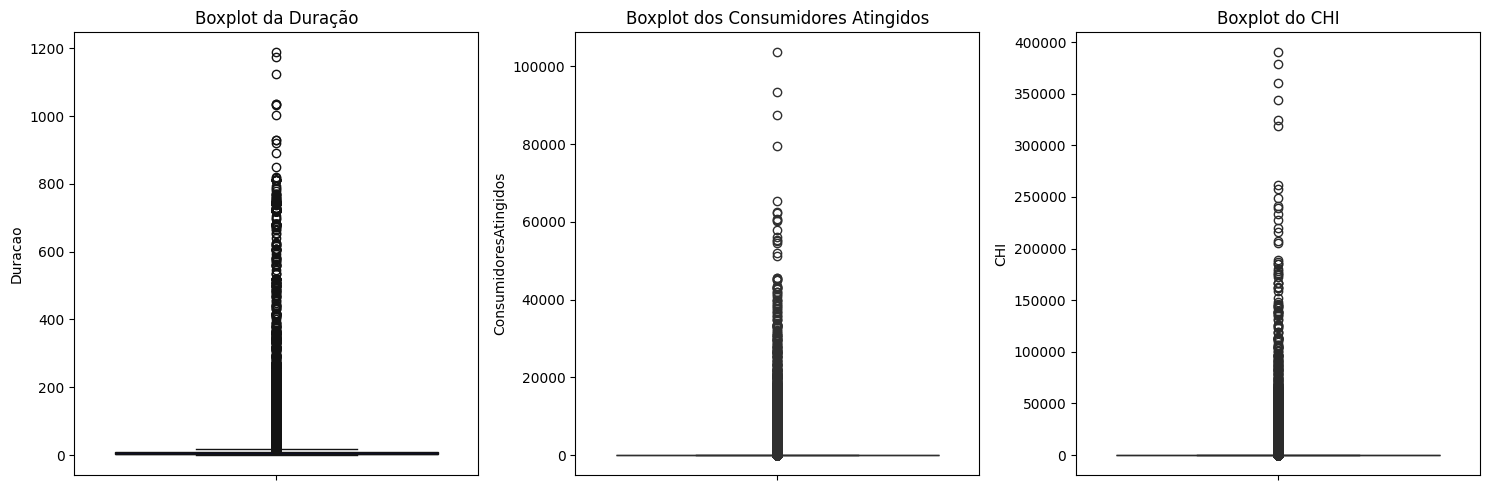

In [49]:
# definindo a figura e o tamanho dos graficos
fig,ax =plt.subplots(1,3, figsize = (15,5))

#plotando o boxplot de duracao
grafico_boxplot_duracao = sns.boxplot(df_nordeste['Duracao'],ax = ax[0],color = '#010440')
grafico_boxplot_duracao.set_title('Boxplot da Duração')
#plotando o boxplot de consumidores atingidos
grafico_boxplot_consumidoresatingidos = sns.boxplot(df_nordeste['ConsumidoresAtingidos'],ax = ax[1],color = '#148C26')
grafico_boxplot_consumidoresatingidos.set_title('Boxplot dos Consumidores Atingidos')
#plotando o boxplot de CHI
grafico_boxplot_chi = sns.boxplot(df_nordeste['CHI'],ax = ax[2],color = '#8C0E03')
grafico_boxplot_chi.set_title('Boxplot do CHI')
# ajustando os gráficos 
plt.tight_layout()
plt.show()

A análise dos boxplots das três variáveis numéricas revela claramente a presença de vários outliers. O tratamento dessas observações atípicas é de suma importância para a análise, pois pode influenciar significativamente os resultados. Existem diversas estratégias disponíveis para lidar com outliers, incluindo a exclusão ou substituição de valores discrepantes.

Entretanto, para esta análise específica, optamos por não excluir ou substituir os outliers. Essas ocorrências representam eventos reais e são de extrema importância para compreender o funcionamento do sistema elétrico como um todo. Portanto, optamos por considerar esses valores extremos como parte integrante do conjunto de dados, a fim de garantir uma análise abrangente e precisa do sistema. 

Para análises de dados, é crucial considerar cuidadosamente qual medida de tendência central utilizar, especialmente diante da presença de outliers. Nesse contexto, a média pode ser fortemente influenciada por valores extremos, o que pode distorcer a interpretação. Portanto, a mediana surge como uma excelente alternativa, proporcionando uma medida mais robusta para compreender a distribuição dos valores.



### 6.2 Análise dos Dados ao Longo dos Meses de 2023

Ao analisar o ano de 2023 como um todo, surgem algumas perguntas intrigantes. A primeira delas é: como será o comportamento da quantidade de interrupções ao longo do ano? Será que é uniforme, ou seja, todos os meses registram quantidades semelhantes, ou será que o período do ano influencia na quantidade de interrupções? Além disso, podemos nos questionar sobre as razões por trás desses padrões. Será possível descobrir as causas subjacentes a essas variações e identificar os principais determinantes que contribuem para o aumento ou diminuição das interrupções ao longo do ano?


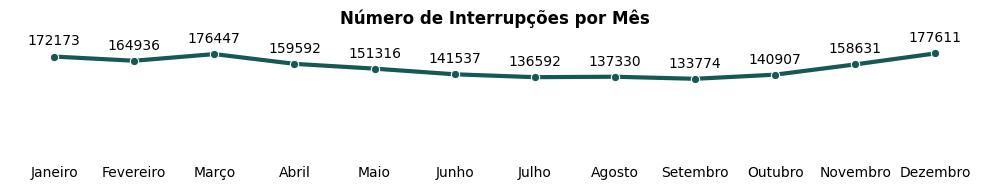

In [50]:
# criando a figura 
plt.figure(figsize=(10,2))
# criando a contagem por mês 
num_ocorrencias_mes = df_nordeste['Mes'].value_counts()
num_ocorrencias_mes.sort_index(ascending=True,inplace=True)
#criando o gráfico 
grafico_num_ocorrencias_mes = sns.lineplot(x = num_ocorrencias_mes.index.astype(str), y = num_ocorrencias_mes.values,marker='o',lw = 3,color= '#155952')
# colocando o eixo x como nome dos meses
nome_meses(grafico_num_ocorrencias_mes,num_ocorrencias_mes)
# Criando o rótulo de dados
rotulo_linhas(grafico_num_ocorrencias_mes,num_ocorrencias_mes,0)
#chamando a função de costumização do gráfico
grafico_vertical(grafico_num_ocorrencias_mes,num_ocorrencias_mes.values,'Número de Interrupções por Mês')

Ao analisarmos o gráfico, é perceptível que o número de ocorrências ao longo do ano não é uniforme. Há meses em que registramos uma quantidade menor de interrupções, enquanto em outros observamos um aumento significativo. Entretanto, dado que estamos examinando apenas um ano de dados, ainda não podemos afirmar com certeza se esse comportamento é considerado atípico ou se é algo esperado. No entanto, com base na minha experiência durante o estágio na área, posso adiantar que essa variação é um fenômeno esperado e está intimamente ligada a um fator chave : o clima.

Com base nessas observações, podemos realizar uma segmentação mais detalhada do comportamento das ocorrências, levando em consideração as estações do ano. Ao analisarmos mais de perto, podemos notar que o número de ocorrências é mais elevado no início e no final do ano, atingindo seu pico em dezembro, durante o verão. Essa tendência persiste durante o outono, com uma leve queda no número de interrupções. A partir de junho, que marca o início do inverno, observamos uma queda mais acentuada nas ocorrências, alcançando seu valor mínimo em setembro, no final do inverno e no início da primavera. Essa análise sazonal oferece insights valiosos sobre como as variações climáticas ao longo do ano podem influenciar as interrupções na rede de distribuição de energia elétrica.

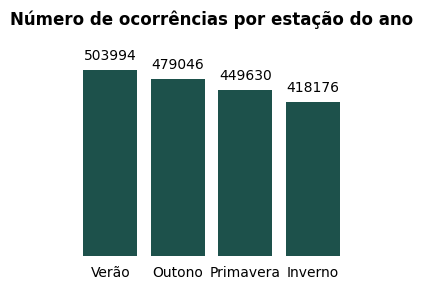

In [82]:
num_ocorrencias_estacao = df_nordeste['Estacao'].value_counts()
#criando a figura 
plt.figure(figsize=(3,3))
# criando o grafico
grafico_estacao = sns.barplot(x = num_ocorrencias_estacao.index, y = num_ocorrencias_estacao.values,color= '#155952')
# colocando o rotulo de dados
rotulo_barra(grafico_estacao,0)
# chamando a função de costumização do grafico
grafico_vertical(grafico_estacao,num_ocorrencias_estacao.values,'Número de ocorrências por estação do ano')

Ao analisar o comportamento das interrupções ao longo das estações do ano, observamos que o verão apresenta o maior número de ocorrências, seguido pelo outono e pela primavera, enquanto o inverno registra o menor número. Essa tendência é observada em toda a região do Nordeste. No entanto, podemos realizar uma análise mais detalhada, segmentando os dados por distribuidora de energia elétrica, que em sua maioria corresponde a cada estado da região. Isso nos permitirá examinar de perto como as características específicas de cada região podem influenciar o número de interrupções ao longo das estações do ano.

In [52]:
# agrupando os dados por distribuidora e estação 
num_ocorrencias_distribuidora_estacao = df_nordeste.groupby(['Distribuidora','Estacao'])['Duracao'].count().reset_index()
# concentrando o dataframe para melhor visualização 
num_ocorrencias_distribuidora_estacao = num_ocorrencias_distribuidora_estacao.pivot(index = 'Distribuidora',columns='Estacao',values='Duracao')
#criando uma copia do dataframe para fazer o filtro
estacoes = num_ocorrencias_distribuidora_estacao.copy()
# Encontrando o nome da coluna com o maior valor em cada linha
estacoes['Estacao com Maior Numero de Ocorrencias'] = num_ocorrencias_distribuidora_estacao.idxmax(axis=1)
# Encontrando o nome da coluna com o menor valor em cada linha
estacoes['Estacao com Menor Numero de Ocorrencias'] = num_ocorrencias_distribuidora_estacao.idxmin(axis=1)
#voltando para o dataframe anterior com as mudanças
num_ocorrencias_distribuidora_estacao = estacoes.copy()
#ordenando o dataframe
num_ocorrencias_distribuidora_estacao.sort_values(by='Estacao com Maior Numero de Ocorrencias',ascending=False,inplace=True)
#exibindo o dataframe
num_ocorrencias_distribuidora_estacao

Estacao,Inverno,Outono,Primavera,Verão,Estacao com Maior Numero de Ocorrencias,Estacao com Menor Numero de Ocorrencias
Distribuidora,,,,,,
COSERN,20725,23923,19949,26451,Verão,Primavera
ENEL CE,81478,92212,80851,96270,Verão,Primavera
Equatorial MA,70072,88968,82420,96193,Verão,Inverno
Equatorial PI,44261,56252,70575,74970,Verão,Inverno
COELBA,53553,57618,62800,62175,Primavera,Inverno
CELPE,51140,57051,46647,51413,Outono,Primavera
EPB,34899,38019,30318,37480,Outono,Primavera
ESE,19641,19671,17270,16795,Outono,Verão
Equatorial AL,34674,37566,32402,35113,Outono,Primavera


Como evidenciado na tabela, quase todas as distribuidoras apresentam seu maior número de ocorrências durante o verão ou o outono, enquanto o menor número de interrupções é observado no inverno ou na primavera. Esses resultados corroboram com a análise anterior das estações do ano, reforçando a influência sazonal nas interrupções na rede de distribuição de energia elétrica.

Embora planejemos analisar as principais causas de interrupção posteriormente, podemos iniciar investigando um possível comportamento similar entre o número interrupções na rede e as condições climáticas. Esta abordagem nos permitirá avaliar se existem padrões ou tendências que associam eventos meteorológicos, como tempestades, ventos fortes ou altas temperaturas, ao aumento das interrupções. Essa análise inicial nos ajudará a entender melhor como as condições climáticas podem impactar a confiabilidade e a estabilidade do sistema elétrico.

In [53]:
# visualizando os dados de chuva 
dados_chuva.head(3)

,Cidade da Medicao,Estado,Mes,Dias de chuva mes,Total de chuva mes
0,SAO LUIS,MA,2023-01,18.0,378.6
1,SAO LUIS,MA,2023-02,0.0,0.0
2,SAO LUIS,MA,2023-03,19.0,510.8


In [54]:
# criando a partir do dataframe com os dados de chuva um agrupamento do total de chuva por mes no nordeste
total_chuva_mes = dados_chuva.groupby('Mes')['Total de chuva mes'].sum()
# criando uma series com os dias de chuva por mes
total_dia_chuva_mes = dados_chuva.groupby('Mes')['Dias de chuva mes'].mean().round(0)

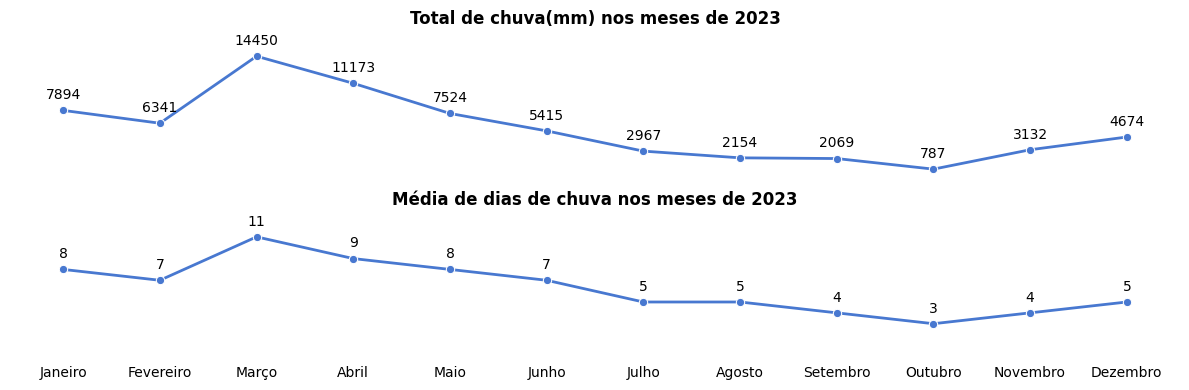

In [55]:
# criando a figura 
fig,ax = plt.subplots(2,1,figsize=(12,4),sharex=True)

# criando o grafico 
grafico_chuva = sns.lineplot( x = total_chuva_mes.index.astype(str),y = total_chuva_mes.values, marker = 'o', lw=2,ax=ax[0])
# Criando o rótulo de dados
rotulo_linhas(grafico_chuva,total_chuva_mes,0)
# costumizando o grafico
grafico_vertical(grafico_chuva,total_chuva_mes,'Total de chuva(mm) nos meses de 2023')

# criando o grafico de dias de chuva por mes 
grafico_chuva_dia = sns.lineplot(x = total_dia_chuva_mes.index.astype(str),y = total_dia_chuva_mes, marker = 'o', lw=2,ax = ax[1])
# criando o rotulo de dados
rotulo_linhas(grafico_chuva_dia,total_dia_chuva_mes,0)
# costumizando o grafico
grafico_vertical(grafico_chuva_dia,total_dia_chuva_mes,'Média de dias de chuva nos meses de 2023')
# colocando o eixo x como nome dos meses
nome_meses(grafico_chuva_dia,total_dia_chuva_mes)


Apesar de ser uma região territorialmente extensa, o Nordeste do Brasil apresenta características climáticas típicas, especialmente em relação ao período chuvoso. Geralmente, a estação das chuvas ocorre no verão e no outono, enquanto a primavera e o inverno são marcados por um período de estiagem, como podemos ver nos gráficos acima.

Os gráficos mostram um padrão similar ao número de ocorrências de interrupção no sistema elétrico de distribuição por mês. Observa-se que as interrupções são mais frequentes entre janeiro e março, quando os valores são mais altos. Após esse período, há uma queda gradual nas interrupções, atingindo o ponto mais baixo entre setembro e outubro. A partir daí, os valores voltam a subir. Este comportamento reflete uma possivel correlação entre o volume de chuvas e as falhas no sistema de distribuição elétrica, indicando que os meses mais chuvosos tendem a ter mais interrupções.

Para isso, vamos investigar mais a fundo a correlação entre os dados sobre chuva e o número de ocorrências de interrupção no sistema elétrico de distribuição. A análise detalhada dessas variáveis pode revelar como os períodos chuvosos afetam a estabilidade do fornecimento de energia elétrica na região.


In [56]:
# criando o dataframe com o numero de ocorrencias para unir com os dados de chuva
num_ocorrencias_mes = num_ocorrencias_mes.reset_index()
num_ocorrencias_mes['Mes'] = num_ocorrencias_mes['Mes'].astype(str)
num_ocorrencias_mes.columns = ['Mes','Numero de Ocorrencias']
# unindo os dados de chuva por mes, dias de chuva e numero de ocorrencias
df1 = pd.merge(total_chuva_mes,num_ocorrencias_mes,on='Mes')
meses_2023 = pd.merge(df1,total_dia_chuva_mes,on = 'Mes')
meses_2023

,Mes,Total de chuva mes,Numero de Ocorrencias,Dias de chuva mes
0,2023-01,7894.4,172173,8.0
1,2023-02,6341.2,164936,7.0
2,2023-03,14450.2,176447,11.0
3,2023-04,11172.8,159592,9.0
4,2023-05,7524.0,151316,8.0
5,2023-06,5415.4,141537,7.0
6,2023-07,2967.0,136592,5.0
7,2023-08,2153.6,137330,5.0
8,2023-09,2069.0,133774,4.0
9,2023-10,786.8,140907,3.0


In [57]:
# calculando a correlacao entre o total chovido por mes e o numero total de interrupções por mes
correlacao_totalchuva_totalocorrencia = meses_2023['Total de chuva mes'].corr(meses_2023['Numero de Ocorrencias']).round(2)
# calculando a correlacao entre o total de dias chovidos por mes e o numero total de interrupções por mes
correlacao_diasdechuva_totalocorrencia = meses_2023['Dias de chuva mes'].corr(meses_2023['Numero de Ocorrencias']).round(2)
# exibindo as correlações
print('A correlação entre o número de ocorrências e o total de chuva no mês é de :', correlacao_totalchuva_totalocorrencia )
print('A correlação entre o número de ocorrências e a média de dias com chuva no mês é de :', correlacao_diasdechuva_totalocorrencia )

A correlação entre o número de ocorrências e o total de chuva no mês é de : 0.67
A correlação entre o número de ocorrências e a média de dias com chuva no mês é de : 0.56


Baseando-se na interpretação do valor da correlação de Parvez Ahammad,mostrada na figura abaixo, e aplicando-a aos dados dessa análise, podemos concluir o seguinte:

**Correlação com o Volume de Chuva Mensal (67%)**: A correlação moderada a alta de aproximadamente 67% entre o número de ocorrências de interrupção no sistema elétrico de distribuição e o total de precipitação mensal no Nordeste indica que um aumento no volume de chuva mensal está fortemente associado a um aumento correspondente no número de interrupções. Isso sugere que períodos de chuvas intensas podem impactar significativamente a operação e a confiabilidade do sistema elétrico na região.

**Correlação com o Total de Dias Chuvosos por Mês (56%)**: A correlação moderada de 56% entre o número de ocorrências de interrupção e o total de dias chuvosos por mês também é significativa. Isso indica que mais dias chuvosos ao longo do mês estão correlacionados a um aumento nas interrupções no sistema elétrico. Embora essa relação seja menos intensa do que a correlação com o volume total de chuva, ela sugere que tanto a intensidade quanto a frequência das chuvas têm impacto na operação do sistema elétrico.

<div style="text-align: center;">
    <figure>
        <img src="correlacao.JPG" alt="Tabela de correlação">
        <figcaption>Tabela de correlação segundo Parvez Ahammad.</figcaption>
    </figure>
</div>

Outra análise que podemos realizar, seguindo a abordagem anterior, é examinar o comportamento ao longo dos meses das variáveis numéricas Duração, Consumidores Atingidos e CHI. Utilizaremos tanto a média quanto a mediana para identificar a presença de ocorrências com valores extremos e entender melhor a distribuição dessas variáveis ao longo do tempo.

In [58]:
# criando o dataframe com as média das variaveis numericas 
media_das_variaveis = df_nordeste.groupby('Mes')[['Duracao','CHI','ConsumidoresAtingidos']].mean().round(2)
# criando o dataframe com as medianas das variaveis numericas 
mediana_das_variaveis = df_nordeste.groupby('Mes')[['Duracao','CHI','ConsumidoresAtingidos']].median().round(2)

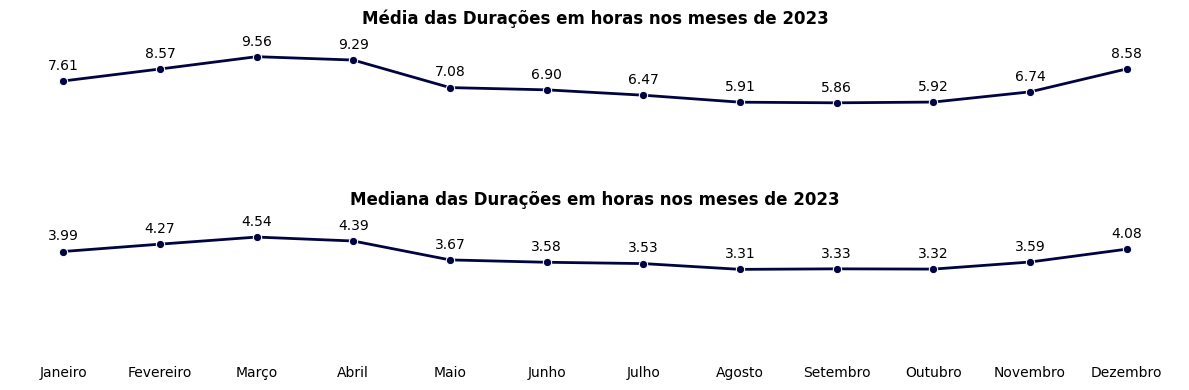

In [59]:
# criando a figura 
fig,ax = plt.subplots(2,1,figsize=(12,4),sharex=True)
# criando o grafico de media de duracao 
grafico_media_duracao = sns.lineplot(data = media_das_variaveis, x = media_das_variaveis.index.astype(str), y = 'Duracao',marker='o',lw = 2, ax = ax[0],color = '#010440')
# Criando o rótulo de dados
rotulo_linhas(grafico_media_duracao,media_das_variaveis['Duracao'],2)
#chamando a função de costumização do gráfico
grafico_vertical(grafico_media_duracao,media_das_variaveis['Duracao'],'Média das Durações em horas nos meses de 2023')
# criando o grafico de mediana de duracao 
grafico_mediana_duracao = sns.lineplot(data = mediana_das_variaveis, x = mediana_das_variaveis.index.astype(str), y = 'Duracao',marker='o',lw = 2, ax = ax[1],color = '#010440')
#chamando a função de rotulo de dados
rotulo_linhas(grafico_mediana_duracao,mediana_das_variaveis['Duracao'],2)
#chamando a função de costumização do gráfico
grafico_vertical(grafico_mediana_duracao,mediana_das_variaveis['Duracao'],'Mediana das Durações em horas nos meses de 2023')
# colocando o eixo x como nome dos meses
nome_meses(grafico_mediana_duracao,mediana_das_variaveis)


Observando os gráficos, podemos notar que o comportamento da média e da mediana ao longo dos meses é semelhante entre si. Além disso, esses padrões são similares aos observados nas análises anteriores relacionadas à chuva no Nordeste, sugerindo que pode haver uma correlação entre a duração das ocorrências e esses padrões climáticos.

É interessante observar que os valores da média são aproximadamente o dobro dos valores da mediana. Isso sugere que existem meses em que ocorrem eventos com durações muito elevadas, que afetam significativamente a média dos dados. Essas ocorrências com valores muito elevados podem influenciar a análise e indicam uma dispersão maior nos dados de duração ao longo do tempo.

In [60]:
# alterando o tipo de dados com o mes para string
mediana_das_variaveis.index = mediana_das_variaveis.index.astype(str)
# unindo o dataframe com o total de chuvas com o das medianas 
mediana_e_meses_2023 = pd.merge(meses_2023,mediana_das_variaveis,on = 'Mes')

In [61]:
# calculando a correlacao entre o total chovido por mes e o numero total de interrupções por mes
correlacao_medianaduracao_totalocorrencia = mediana_e_meses_2023['Total de chuva mes'].corr(mediana_e_meses_2023['Duracao']).round(2)
# exibindo a correlacao
print('A correlação entre a duração das ocorrências e o total de chuva no mês é de :', correlacao_medianaduracao_totalocorrencia )

A correlação entre a duração das ocorrências e o total de chuva no mês é de : 0.88


A correlação de 88% entre a mediana da duração das interrupções por mês e o total de chuva por mês indica uma forte relação entre essas variáveis. Isso sugere que a quantidade de chuva influencia significativamente o tempo necessário para recompor (consertar) as interrupções no sistema elétrico de distribuição.

Vamos verificar agora o comportamento com relação aos Consumidores Atingidos 

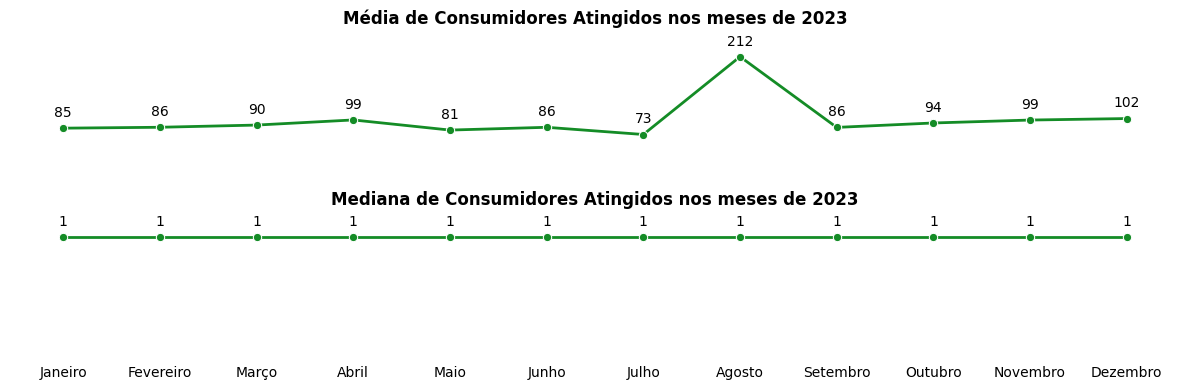

In [62]:
# criando a figura 
fig,ax = plt.subplots(2,1,figsize=(12,4),sharex=True)

# criando o grafico de media de consumidores atingidos
grafico_media_consumidores = sns.lineplot(data = media_das_variaveis, x = media_das_variaveis.index.astype(str), y = 'ConsumidoresAtingidos',marker='o',lw = 2, ax = ax[0],color = '#148C26')
#chamando a função de rotulo de dados
rotulo_linhas(grafico_media_consumidores,media_das_variaveis['ConsumidoresAtingidos'],0)
#chamando a função de costumização do gráfico
grafico_vertical(grafico_media_consumidores,media_das_variaveis['ConsumidoresAtingidos'],'Média de Consumidores Atingidos nos meses de 2023')
# criando o grafico de mediana de consumidores atingidos
grafico_mediana_consumidores = sns.lineplot(data = mediana_das_variaveis, x = mediana_das_variaveis.index.astype(str), y = 'ConsumidoresAtingidos',marker='o',lw = 2, ax = ax[1],color = '#148C26')
#chamando a função de rotulo de dados
rotulo_linhas(grafico_mediana_consumidores,mediana_das_variaveis['ConsumidoresAtingidos'],0)
#chamando a função de costumização do gráfico
grafico_vertical(grafico_mediana_consumidores,mediana_das_variaveis['ConsumidoresAtingidos'],'Mediana de Consumidores Atingidos nos meses de 2023')
# colocando o eixo x como nome dos meses
nome_meses(grafico_mediana_consumidores,mediana_das_variaveis)
plt.show()

Em relação aos Consumidores Atingidos, os gráficos de média e mediana revelam informações bastante importantes. Primeiramente, observamos uma diferença significativa em seus comportamentos. Enquanto a mediana mostra uma estabilidade ao longo dos meses, indicando que metade das ocorrências registra apenas um consumidor atingido, a média apresenta variações mensais notáveis.

Em particular, no mês de agosto, observamos uma variação significativa no valor médio. Isso sugere que eventos ocorridos neste mês impactaram fortemente o número de consumidores afetados, influenciando tanto a média mensal quanto a média anual, como já mencionado anteriormente. Vamos investigar mais detalhadamente este mês para compreender melhor esses eventos específicos.

Antes disso, vamos analisar o comportamento do CHI (índice de interrupções por consumidor) durante o ano. Vale ressaltar que, para os Consumidores Atingidos, não foi feita uma análise de correlação, pois a mediana se manteve constante ao longo do período.

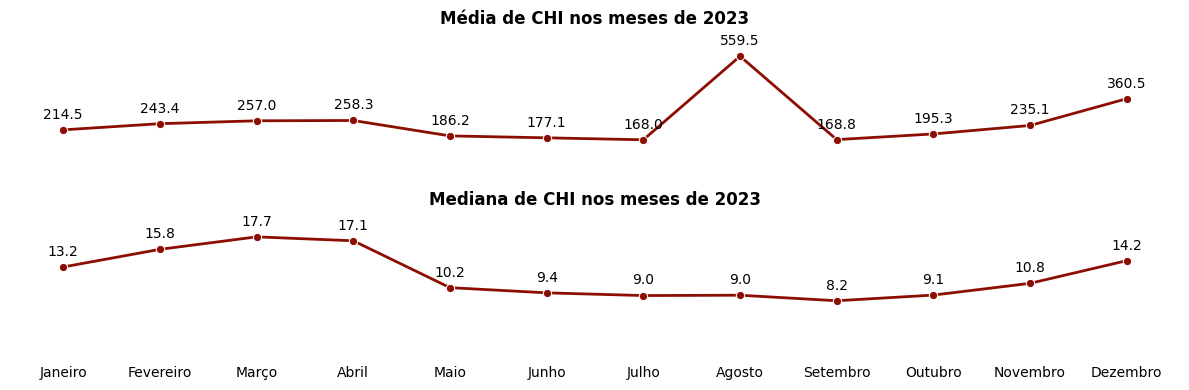

In [63]:
# criando a figura 
fig,ax = plt.subplots(2,1,figsize=(12,4),sharex=True)

# criando o grafico de media de chi
grafico_media_chi = sns.lineplot(data = media_das_variaveis, x = media_das_variaveis.index.astype(str), y = 'CHI',marker='o',lw = 2, ax = ax[0],color = '#8C0E03')
#chamando a função de rotulo de dados
rotulo_linhas(grafico_media_chi,media_das_variaveis['CHI'],1)
#chamando a função de costumização do gráfico
grafico_vertical(grafico_media_chi,media_das_variaveis['CHI'],'Média de CHI nos meses de 2023')

# criando o grafico de mediana de chi
grafico_mediana_chi = sns.lineplot(data = mediana_das_variaveis, x = mediana_das_variaveis.index.astype(str), y = 'CHI',marker='o',lw = 2, ax = ax[1],color = '#8C0E03')
#chamando a função de rotulo de dados
rotulo_linhas(grafico_mediana_chi,mediana_das_variaveis['CHI'],1)
#chamando a função de costumização do gráfico
grafico_vertical(grafico_mediana_chi,mediana_das_variaveis['CHI'],'Mediana de CHI nos meses de 2023')
# colocando o eixo x como nome dos meses
nome_meses(grafico_mediana_chi,mediana_das_variaveis)
plt.show()

Considerando que o CHI é o resultado da multiplicação entre Duração e Consumidores Atingidos, podemos observar através dos gráficos que a média do CHI é fortemente influenciada pelo comportamento dos Consumidores Atingidos, especialmente com um pico em agosto. Na mediana, entretanto, esse comportamento não exerce tanta influência, apresentando um padrão mais similar ao da mediana da Duração.

Isso indica que, enquanto a média do CHI reflete variações significativas nos consumidores atingidos, particularmente devido a eventos extremos como os de agosto, a mediana do CHI permanece mais estável, refletindo predominantemente a mediana da Duração das interrupções. Este padrão sugere que, na maioria dos casos, as interrupções afetam um número constante de consumidores, mas eventos excepcionais podem aumentar significativamente a média do CHI.

In [64]:
# calculando a correlacao entre o total chovido por mes e o numero total de interrupções por mes
correlacao_medianachi_totalocorrencia = mediana_e_meses_2023['Total de chuva mes'].corr(mediana_e_meses_2023['CHI']).round(2)
# exibindo a correlacao
print('A correlação entre o CHI das ocorrências e o total de chuva no mês é de :', correlacao_medianachi_totalocorrencia )

A correlação entre o CHI das ocorrências e o total de chuva no mês é de : 0.83


Como esperado, a mediana do CHI se comporta de forma similar ao gráfico da mediana da Duração, indicando uma correlação forte entre CHI e o total de chuva no mês. Isso nos mostra que o Indicador CHI está relacionado com o total de chuva naquele mês para 2023 no Nordeste.

Portanto, podemos concluir que os meses com maior precipitação tendem a registrar maiores valores de CHI, reforçando a influência das condições climáticas nas interrupções de energia.

Contudo, ainda temos perguntas a responder em relação às ocorrências ao longo dos meses. A principal delas, que veremos agora, é: O que aconteceu em agosto para que a média nesse mês fosse tão elevada em relação aos outros meses do ano?

Para entender melhor esse fenômeno, vamos investigar os eventos específicos ocorridos em agosto.


#### 6.2.1 Visualizando o mês de Agosto 

Para entender agosto, vamos começar utilizando a media diária, pois ela é mais afetada por valores extremos. Isso nos permitirá determinar se o evento ocorreu ao longo do mês inteiro, durante uma semana específica, por mais de uma semana, ou apenas em alguns dias.

In [65]:
# criando um dataframe apenas para analisar o mes de agosto 
agosto = df_nordeste[df_nordeste['Mes'] == '2023-08']
# criando uma coluna com o dia para o mesm de agosto
agosto['Dia'] = agosto['InicioInterrupcao'].dt.to_period('D').astype(str)
agosto['Dia'] = agosto['Dia'].str[-2:]
# criando o dataframe com as média das variaveis numericas 
media_das_variaveis_agosto = agosto.groupby('Dia')[['Duracao','CHI','ConsumidoresAtingidos']].mean().round(2)


<function matplotlib.pyplot.show(close=None, block=None)>

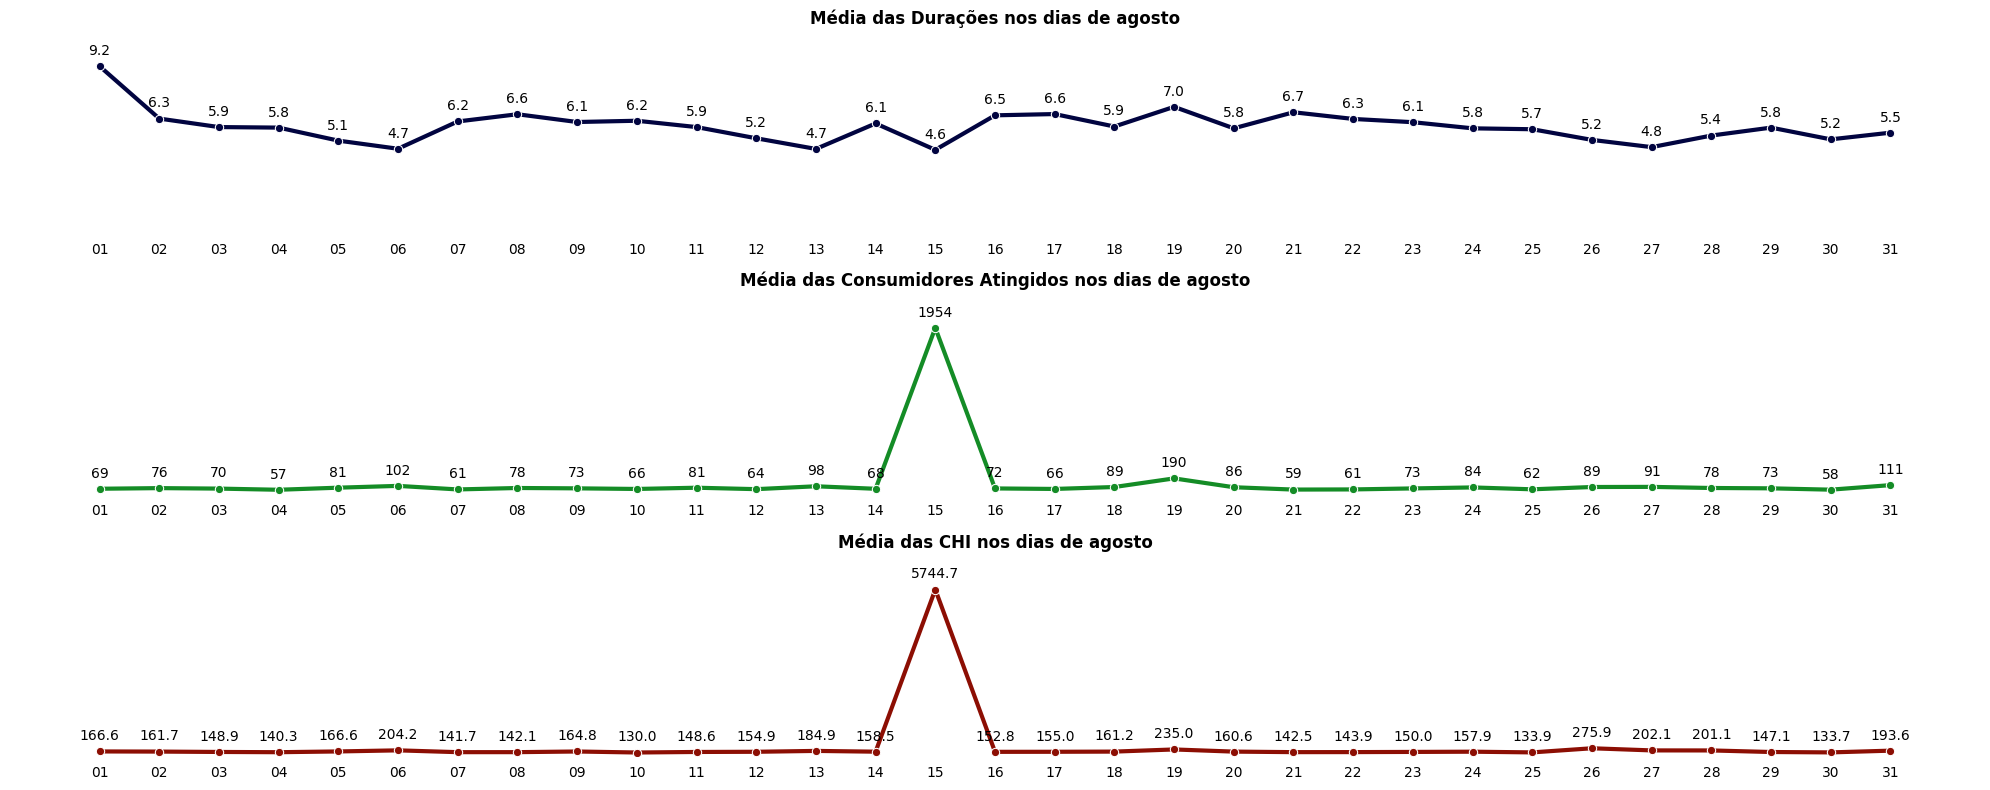

In [66]:
# criando a figura 
fig,ax = plt.subplots(3,1,figsize=(20,8))

# criando o grafico de media de duracao 
grafico_media_duracao_agosto = sns.lineplot(data = media_das_variaveis_agosto, x = media_das_variaveis_agosto.index.astype(str), y = 'Duracao',marker='o',lw = 3, ax = ax[0],color = '#010440')
#chamando a função de rotulo de dados
rotulo_linhas(grafico_media_duracao_agosto,media_das_variaveis_agosto['Duracao'],1)
#chamando a função de costumização do gráfico
grafico_vertical(grafico_media_duracao_agosto,media_das_variaveis_agosto['Duracao'],'Média das Durações nos dias de agosto')

# criando o grafico de media de Consumidores Atingidos 
grafico_media_consumidores_agosto = sns.lineplot(data = media_das_variaveis_agosto, x = media_das_variaveis_agosto.index.astype(str), y = 'ConsumidoresAtingidos',marker='o',lw = 3, ax = ax[1],color = '#148C26')
#chamando a função de rotulo de dados
rotulo_linhas(grafico_media_consumidores_agosto,media_das_variaveis_agosto['ConsumidoresAtingidos'],0)
#chamando a função de costumização do gráfico
grafico_vertical(grafico_media_consumidores_agosto,media_das_variaveis_agosto['ConsumidoresAtingidos'],'Média das Consumidores Atingidos nos dias de agosto')

# criando o grafico de media de chi 
grafico_media_chi_agosto = sns.lineplot(data = media_das_variaveis_agosto, x = media_das_variaveis_agosto.index.astype(str), y = 'CHI',marker='o',lw = 3, ax = ax[2],color = '#8C0E03')
#chamando a função de rotulo de dados
rotulo_linhas(grafico_media_chi_agosto,media_das_variaveis_agosto['CHI'],1)
#chamando a função de costumização do gráfico
grafico_vertical(grafico_media_chi_agosto,media_das_variaveis_agosto['CHI'],'Média das CHI nos dias de agosto')

plt.show

Podemos observar que o comportamento ao longo do mês é geralmente estável, exceto pelo dia 15 de agosto, quando houve um pico muito elevado na média de consumidores afetados, aproximadamente 10 vezes maior do que a maior média em outros dias do mês. No entanto, em relação à duração das interrupções no sistema elétrico, não há outliers semelhantes registrados para o dia 15. Com essas observações, podemos investigar a causa específica registrada nos dados que levou a esse número elevado de clientes afetados.

In [67]:
agosto.head()

,Distribuidora,Conjunto,NumConsumidoresConjunto,Alimentador,Subestacao,InicioInterrupcao,FimInterrupcao,NivelTensao,ConsumidoresAtingidos,MotivoExpurgo,Origem,Tipo,Responsabilidade,Causa,Duracao,CHI,Mes,Turno,Estacao,Dia
1102593,Equatorial MA,BARREIRINHAS,25312,01C2,BRN,2023-08-01 00:00:01,2023-08-31 23:59:00,380,1,Sem Expurgo,Interna,Nao Programada,Proprias Do Sistema,Falha De Material Ou Equipamento,743.98,743.98,2023-08,Madrugada,Inverno,01
1102594,Equatorial MA,BARREIRINHAS,25312,01C2,BRN,2023-08-01 00:00:01,2023-08-15 15:00:01,380,1,Sem Expurgo,Interna,Nao Programada,Proprias Do Sistema,Falha De Material Ou Equipamento,351.00,351.00,2023-08,Madrugada,Inverno,01
1102595,Equatorial MA,BARREIRINHAS,25312,01C4,BRN,2023-08-01 00:00:01,2023-08-31 23:59:00,380,1,Sem Expurgo,Interna,Nao Programada,Proprias Do Sistema,Falha De Material Ou Equipamento,743.98,743.98,2023-08,Madrugada,Inverno,01
1102596,Equatorial MA,BARREIRINHAS,25312,01C3,BRN,2023-08-01 00:00:02,2023-08-17 17:40:00,380,1,Sem Expurgo,Interna,Nao Programada,Proprias Do Sistema,Falha De Material Ou Equipamento,401.67,401.67,2023-08,Madrugada,Inverno,01
1102597,Equatorial MA,BARREIRINHAS,25312,01C3,BRN,2023-08-01 00:00:03,2023-08-11 17:00:44,380,1,Sem Expurgo,Interna,Nao Programada,Proprias Do Sistema,Falha De Material Ou Equipamento,257.01,257.01,2023-08,Madrugada,Inverno,01


In [68]:
# criando um dataframe apenas com dia 15
dia_15 = agosto[agosto['Dia'] == '15']
# ordenando o dataframe por consumidores atingidos
dia_15.sort_values(by='ConsumidoresAtingidos',ascending=False).head(5)


,Distribuidora,Conjunto,NumConsumidoresConjunto,Alimentador,Subestacao,InicioInterrupcao,FimInterrupcao,NivelTensao,ConsumidoresAtingidos,MotivoExpurgo,Origem,Tipo,Responsabilidade,Causa,Duracao,CHI,Mes,Turno,Estacao,Dia
1163130,Equatorial AL,TABULEIRO DOS MARTINS,117145,-,TBM,2023-08-15 08:30:49,2023-08-15 09:22:00,69000,103581,Alívio de Carga ONS,Externa,Nao Programada,Proprias Do Sistema,Atuacao De Sistema Especial De Protecao (Sep),0.85,88043.85,2023-08,Manhã,Inverno,15
1165413,Equatorial AL,BENEDITO BENTES,90032,-,BBE,2023-08-15 08:32:00,2023-08-15 09:10:00,69000,79498,Alívio de Carga ONS,Externa,Nao Programada,Proprias Do Sistema,Atuacao De Sistema Especial De Protecao (Sep),0.63,50083.74,2023-08,Manhã,Inverno,15
1165383,Equatorial AL,ARAPIRACA II,98427,-,ARD,2023-08-15 08:32:00,2023-08-15 09:40:00,69000,65439,Alívio de Carga ONS,Externa,Nao Programada,Proprias Do Sistema,Atuacao De Sistema Especial De Protecao (Sep),1.13,73946.07,2023-08,Manhã,Inverno,15
1161248,Equatorial PI,POTY,62495,-,PTY,2023-08-15 08:30:38,2023-08-15 14:45:00,69000,62483,Alívio de Carga ONS,Externa,Nao Programada,Proprias Do Sistema,Atuacao De Sistema Especial De Protecao (Sep),6.24,389893.92,2023-08,Manhã,Inverno,15
1161280,Equatorial PI,SATÉLITE,70385,-,PTY,2023-08-15 08:30:38,2023-08-15 14:45:00,69000,60720,Alívio de Carga ONS,Externa,Nao Programada,Proprias Do Sistema,Atuacao De Sistema Especial De Protecao (Sep),6.24,378892.80,2023-08,Manhã,Inverno,15


Analisando detalhadamente as principais ocorrências do dia 15 de agosto, observamos que por volta das 08h30 da manhã várias ocorrências simultâneas se iniciaram, afetando muitos clientes. Essas ocorrências foram identificadas como Alívio de Carga pelo ONS (Operador Nacional do Sistema), sendo externas ao sistema de distribuição, não programadas, e com responsabilidade relacionada ao Alívio de Carga ou características próprias do sistema. A causa identificada foi a atuação do sistema especial de proteção (SEP). Tais incidentes, que afetam um grande número de consumidores, são comumente conhecidos como apagões.

Ao pesquisar na internet sobre o ocorrido em 15 de agosto, encontramos diversas notícias e relatos sobre o evento e suas causas. Isso confirma que o outlier em nossa base de dados não foi um erro de preenchimento, mas sim uma ocorrência real de escala nacional. O Operador Nacional do Sistema Elétrico (ONS) divulgou várias informações sobre o incidente, incluindo comunicados publicados no dia do ocorrido.

"O Operador Nacional do Sistema Elétrico (ONS) confirma que hoje, dia 15 de agosto, às 8h31min, houve uma ocorrência no Sistema Interligado Nacional (SIN) que provocou a separação elétrica das regiões Norte e Nordeste das regiões Sul e Sudeste/Centro-Oeste, com abertura das interligações entre essas regiões. Houve pelo menos a perda de 18.900 MW de energia. A interrupção no Sul e no Sudeste foi uma ação controlada para evitar propagação da ocorrência.

O Operador, assim que identificou a situação, iniciou ação conjunta com os agentes para restabelecer a energia nas regiões. A normalização das cargas da região Sul foi concluída às 9h05min e nas regiões Sudeste/Centro-Oeste, às 9h33min. O SIN foi 100% recomposto às 14h49min.

As causas da ocorrência ainda estão sendo apuradas."

Fonte :
https://www.ons.org.br/Paginas/Noticias/20230815-OCORR%C3%8ANCIA-NO-SIN-EM-15-08-2023-ENERGIA-RESTABELECIDA-EM-TODO-O-PA%C3%8DS.aspx


In [69]:
alivio_de_carga_ano = df_nordeste.query('Responsabilidade == "Alivio De Carga"').shape[0]
alivio_de_carga_dia15 = agosto[agosto['Dia'] == '15']['Responsabilidade'].value_counts().get('Alivio De Carga', 0)
print(f'No ano de 2023 houveram {alivio_de_carga_ano} ocorrencias cuja responsaliade era Alivio de Carga, das quais {alivio_de_carga_dia15}, ou seja {(alivio_de_carga_ano / alivio_de_carga_dia15) * 100} % ,ocorreram no dia 15 de Agosto de 2023')

No ano de 2023 houveram 1754 ocorrencias cuja responsaliade era Alivio de Carga, das quais 1754, ou seja 100.0 % ,ocorreram no dia 15 de Agosto de 2023


Para se ter uma ideia, ao longo de todo o ano, o único dia em que ocorreram eventos de Alívio de Carga foi em 15 de agosto.

### 6.3 Analise das Causas

O próximo passo na análise será examinar as variáveis categóricas, avaliando-as com base no número de ocorrências na base de dados. Além disso, iremos relacioná-las com as variáveis numéricas utilizando a mediana, que se mostrou mais robusta e menos suscetível a outliers. Com essa análise, pretendemos obter conclusões relevantes sobre as características das interrupções no sistema de distribuição de energia elétrica. A partir dos dados, poderemos fornecer informações importantes para as distribuidoras de energia, indicando em quais ocorrências elas devem focar suas ações para melhorar a eficiência e a confiabilidade do serviço.


##### 6.3.1 Origem

A primeira variável categórica que iremos avaliar é a origem das ocorrências. As interrupções podem ser oriundas do próprio sistema de distribuição de energia, ou seja, de origem interna, ou podem ser de origem externa, relacionadas a outros setores do sistema elétrico, como geração e transmissão. 

In [70]:
# Agrupando por origem 
grupo_origem = df_nordeste.groupby('Origem')[['Duracao','ConsumidoresAtingidos','CHI']]
# contando o numero de ocorrencias por origem
contagem_origem = df_nordeste['Origem'].value_counts()
# calculando a mediana
mediana_origem = grupo_origem.median()
# exibindo a quantidade de ocorrencias por origem 
print(f'Das {df_nordeste.shape[0]} interrupções no Nordeste em 2023: '
      f'{(contagem_origem.get('Interna',0)/df_nordeste.shape[0]).round(3) * 100}% são de origem interna '
       f'e {(contagem_origem.get('Externa',0)/df_nordeste.shape[0]).round(3) * 100}% de origem externa')


Das 1850846 interrupções no Nordeste em 2023: 99.7% são de origem interna e 0.3% de origem externa


A análise da variável "Origem" revela que quase 100% das ocorrências registradas na base de dados são de origem interna, indicando que a maioria das interrupções no sistema de distribuição de energia elétrica ao longo do ano foram causadas por fatores internos. Isso mostra que houve poucos casos registrados no Nordeste onde a origem das interrupções foi externa, como no setor de transmissão. Essa informação sugere que as ações de melhoria e manutenção devem ser prioritariamente focadas no próprio sistema de distribuição.

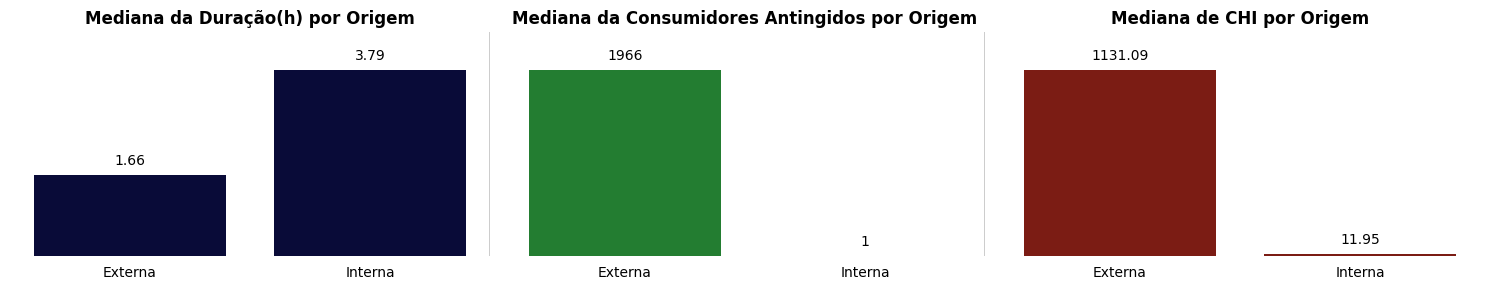

In [71]:
#criando a figura 
fig,ax = plt.subplots(1,3,figsize=(15,3))

#criando o grafico da mediana por duração 
grafico_mediana_duracao_origem = sns.barplot(data = mediana_origem, x = mediana_origem.index, y= 'Duracao',ax = ax[0],color = '#010440')
#colocando o rotulo de grafico 
rotulo_barra(grafico_mediana_duracao_origem,2)
# colocando a costumização do grafico
grafico_vertical(grafico_mediana_duracao_origem,mediana_origem['Duracao'], 'Mediana da Duração(h) por Origem')
#criando o grafico da mediana por consumidor atingido 
grafico_mediana_cons_origem = sns.barplot(data = mediana_origem, x = mediana_origem.index, y= 'ConsumidoresAtingidos',ax = ax[1],color = '#148C26')
#colocando o rotulo de grafico 
rotulo_barra(grafico_mediana_cons_origem ,0)
# colocando a costumização do grafico
grafico_vertical(grafico_mediana_cons_origem ,mediana_origem['ConsumidoresAtingidos'], 'Mediana da Consumidores Antingidos por Origem')
#criando o grafico da media por chi
grafico_mediana_chi_origem = sns.barplot(data = mediana_origem, x = mediana_origem.index, y= 'CHI',ax = ax[2],color = '#8C0E03')
#colocando o rotulo de grafico 
rotulo_barra(grafico_mediana_chi_origem,2)
# colocando a costumização do grafico
grafico_vertical(grafico_mediana_chi_origem,mediana_origem['CHI'], 'Mediana de CHI por Origem')

# separando os graficos
for ax_index in range(len(ax) - 1):
    ax[ax_index].axvline(x=ax[ax_index].get_xlim()[1], color='black', linewidth=1)

plt.tight_layout()


Ao analisar os gráficos das medianas em relação à origem das ocorrências, podemos verificar que, para interrupções de origem interna, metade delas dura aproximadamente 3,79 horas. No entanto, em metade dessas ocorrências, apenas um cliente é afetado, resultando em uma mediana de CHI (Clientes-Hora Interrompidos) de 11,95. Em contraste, as ocorrências de origem externa, que representam apenas 0,3% da base de dados, têm uma duração menor, mas afetam um número significativamente maior de clientes, resultando em um CHI muito elevado. Com isso, podemos concluir que é essencial adotar ações para evitar ocorrências externas ao sistema de distribuição, a fim de minimizar o impacto sobre o número de clientes interrompidos e melhorar a confiabilidade e a percepção do serviço com o consumidor de energia.

##### 6.3.2 Tipo

A próxima variável que iremos analisar é o Tipo de ocorrência, ou seja, se a interrupção foi programada ou não programada. Essa distinção é muito importante para nossa análise, pois as ocorrências não programadas estão associadas a defeitos ou reparos inesperados. Compreender a diferença entre esses tipos de interrupções nos ajudará a identificar padrões e áreas que necessitam de melhorias, permitindo uma gestão mais eficiente das operações e manutenção do sistema de distribuição de energia.

In [72]:
# Agrupando por origem 
grupo_tipo = df_nordeste.groupby('Tipo')[['Duracao','ConsumidoresAtingidos','CHI']]
# contando o numero de ocorrencias por origem
contagem_tipo = df_nordeste['Tipo'].value_counts()
# calculando a mediana
mediana_tipo = grupo_tipo.median()
# exibindo a quantidade de ocorrencias por origem 
print(f'Das {df_nordeste.shape[0]} interrupções no Nordeste em 2023:  '
      f'{(contagem_tipo.get('Nao Programada',0) / df_nordeste.shape[0]).round(2) * 100}% são do tipo Não Programada '
       f'e {(contagem_tipo.get('Programada',0)/df_nordeste.shape[0]).round(2) * 100}% são do tipo Programada')

Das 1850846 interrupções no Nordeste em 2023:  97.0% são do tipo Não Programada e 3.0% são do tipo Programada


Como podemos observar, há um desequilíbrio significativo entre os dois tipos de interrupções, assim como vimos em relação à Origem. As ocorrências não programadas representam 97% das interrupções de energia, enquanto as programadas representam apenas 3%. Essa diferença é bastante pronunciada e indica que a grande maioria das interrupções está relacionada a eventos inesperados e não planejados.

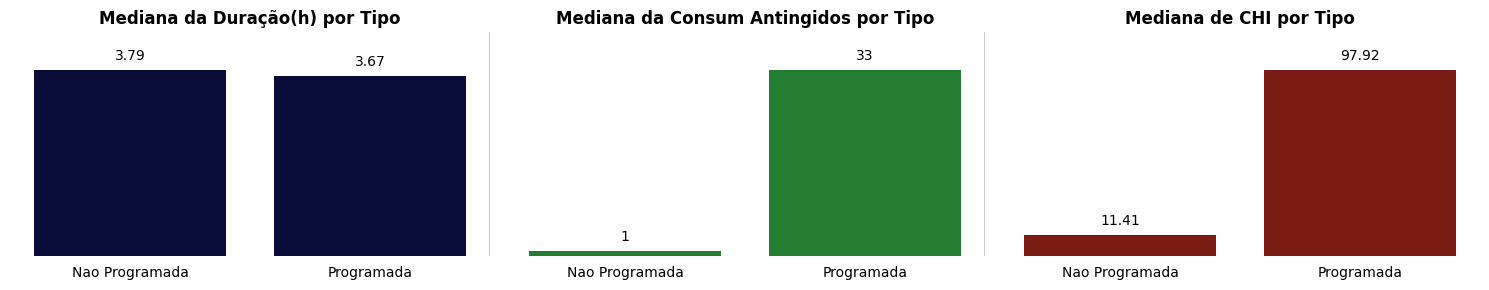

In [73]:
#criando a figura 
fig,ax = plt.subplots(1,3,figsize=(15,3))

#criando o grafico da mediana por duracao para tipo
grafico_mediana_duracao_tipo = sns.barplot(data = mediana_tipo, x = mediana_tipo.index, y= 'Duracao',ax = ax[0],color = '#010440')
#colocando o rotulo de grafico 
rotulo_barra(grafico_mediana_duracao_tipo,2)
# colocando a costumização do grafico
grafico_vertical(grafico_mediana_duracao_tipo,mediana_tipo['Duracao'], 'Mediana da Duração(h) por Tipo')
#criando o grafico da media por duração 
grafico_mediana_cons_tipo = sns.barplot(data = mediana_tipo, x = mediana_tipo.index, y= 'ConsumidoresAtingidos',ax = ax[1],color = '#148C26')
#colocando o rotulo de grafico 
rotulo_barra(grafico_mediana_cons_tipo,0)
# colocando a costumização do grafico
grafico_vertical(grafico_mediana_cons_tipo,mediana_tipo['ConsumidoresAtingidos'], 'Mediana da Consum Antingidos por Tipo')
#criando o grafico da media por duração 
grafico_mediana_chi_tipo = sns.barplot(data = mediana_tipo, x = mediana_tipo.index, y= 'CHI',ax = ax[2],color = '#8C0E03')
#colocando o rotulo de grafico 
rotulo_barra(grafico_mediana_chi_tipo,2)
# colocando a costumização do grafico
grafico_vertical(grafico_mediana_chi_tipo,mediana_tipo['CHI'], 'Mediana de CHI por Tipo')

for ax_index in range(len(ax) - 1):
    ax[ax_index].axvline(x=ax[ax_index].get_xlim()[1], color='black', linewidth=1)

plt.tight_layout()

Os gráficos por tipo de ocorrência revelam que a duração das interrupções programadas e não programadas tem praticamente a mesma mediana. No entanto, o número de consumidores atingidos difere significativamente entre os dois tipos. Para ocorrências programadas, metade delas afeta mais de 33 consumidores, resultando em um CHI elevado. Isso ocorre porque as interrupções programadas geralmente são realizadas em áreas maiores, afetando mais clientes, como interrupções programadas em alimentadores, subestações para ampliação da rede ou manutenção. Em contraste, as ocorrências não programadas afetam apenas um consumidor na metade dos casos, refletindo a natureza mais localizada e inesperada desses eventos.

##### 6.3.4 Responsabilidade

A variável que chamamos de "Responsabilidade" das ocorrências está relacionada à causa macro ou ao tipo de causa que levou à interrupção. Existem oito tipos diferentes de responsabilidade, conforme ilustrado no gráfico a seguir. Essa categorização é fundamental, pois nos ajuda a compreender os principais fatores geradores das ocorrências. Com essa análise, podemos identificar áreas específicas para atuar de forma preventiva, aprimorando a confiabilidade do sistema de distribuição de energia.

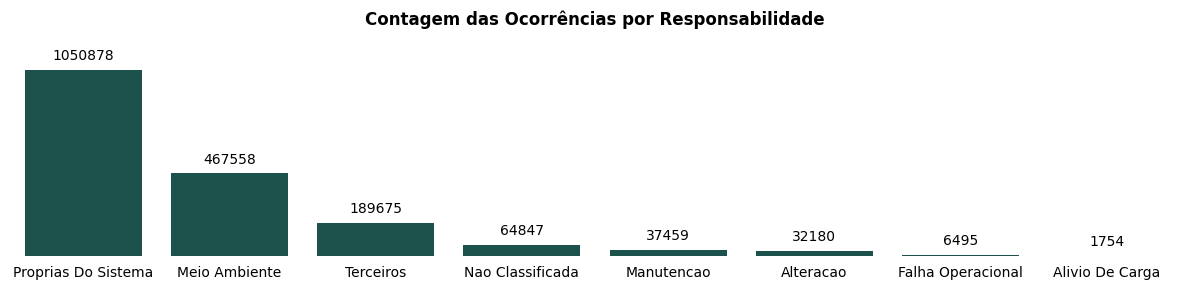

In [74]:
# Agrupando por origem e calculando a mediana
mediana_resp = df_nordeste.groupby('Responsabilidade')[['Duracao','ConsumidoresAtingidos','CHI']].median()
mediana_resp = mediana_resp.reset_index()
# contando o numero de ocorrencias por origem
contagem_resp = df_nordeste['Responsabilidade'].value_counts().sort_values(ascending=False)
contagem_resp_df = contagem_resp.reset_index()
# criando a figura 
plt.figure(figsize=(12,3))
#criando o grafico de contagem por responsabilidade
grafico_resp_cont = sns.barplot(data = contagem_resp_df, x = 'Responsabilidade' , y = 'count',order = contagem_resp_df['Responsabilidade'],color= '#155952' )
# colocando o rotulo 
rotulo_barra(grafico_resp_cont,0)
#chamando a costumização 
grafico_vertical(grafico_resp_cont,contagem_resp_df['count'],'Contagem das Ocorrências por Responsabilidade')
plt.tight_layout()


Podemos observar que as responsabilidades "Próprias do Sistema" e as relacionadas ao "Meio Ambiente" são as que mais afetam o sistema elétrico de distribuição. As interrupções próprias do sistema representam mais da metade dessas ocorrências. Isso se deve ao fato de que o sistema de distribuição de energia elétrica é muito extenso e exposto, estando sujeito a desgastes causados diretamente pelo meio ambiente ou por terceiros, além de fatores indiretos. Essa vulnerabilidade implica no alto número de interrupções próprias do sistema, destacando a necessidade de medidas preventivas e de manutenção para melhorar a confiabilidade do serviço.

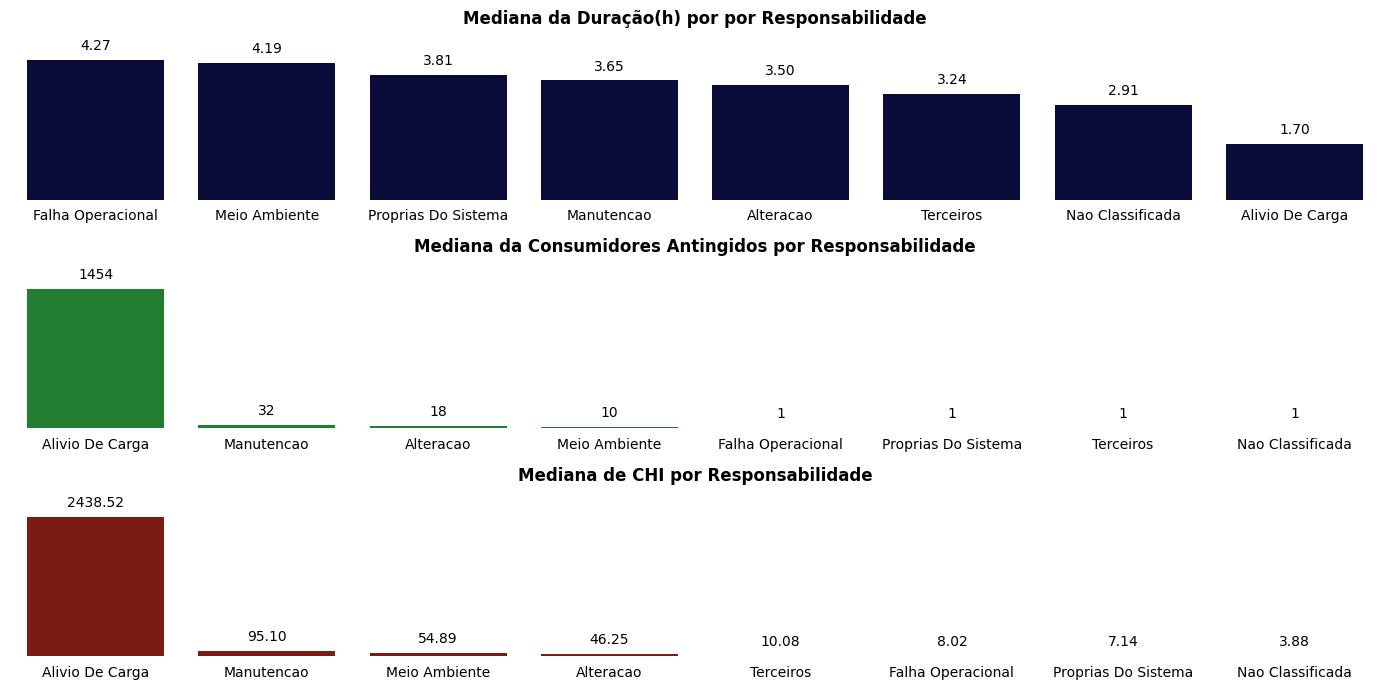

In [75]:
#criando a figura 
fig,ax = plt.subplots(3,1,figsize=(14,7))


# Ordenando mediana_resp pelo valor da mediana da 'Duracao'
mediana_resp = mediana_resp.sort_values(by='Duracao', ascending=False)
#criando o grafico da mediana por duracao para tipo
grafico_mediana_duracao_resp = sns.barplot(data = mediana_resp, x = 'Responsabilidade', y= 'Duracao',ax = ax[0], order = mediana_resp['Responsabilidade'],color = '#010440')
#colocando o rotulo de grafico 
rotulo_barra(grafico_mediana_duracao_resp,2)
# colocando a costumização do grafico
grafico_vertical(grafico_mediana_duracao_resp,mediana_resp['Duracao'], 'Mediana da Duração(h) por por Responsabilidade')

# Ordenando mediana_resp pelo valor da mediana da 'Duracao'
mediana_resp = mediana_resp.sort_values(by='ConsumidoresAtingidos', ascending=False)
#criando o grafico da media por duração 
grafico_mediana_cons_resp = sns.barplot(data = mediana_resp, x = 'Responsabilidade', y= 'ConsumidoresAtingidos',ax = ax[1], order = mediana_resp['Responsabilidade'],color = '#148C26')
#colocando o rotulo de grafico 
rotulo_barra(grafico_mediana_cons_resp,0)
# colocando a costumização do grafico
grafico_vertical(grafico_mediana_cons_resp,mediana_resp['ConsumidoresAtingidos'], 'Mediana da Consumidores Antingidos por Responsabilidade')

# Ordenando mediana_resp pelo valor da mediana da 'Duracao'
mediana_resp = mediana_resp.sort_values(by='CHI', ascending=False)
#criando o grafico da media por duração 
grafico_mediana_chi_resp = sns.barplot(data = mediana_resp, x = 'Responsabilidade', y= 'CHI',ax = ax[2],order = mediana_resp['Responsabilidade'],color = '#8C0E03')
#colocando o rotulo de grafico 
rotulo_barra(grafico_mediana_chi_resp,2)
# colocando a costumização do grafico
grafico_vertical(grafico_mediana_chi_resp,mediana_resp['CHI'], 'Mediana de CHI por Responsabilidade')

plt.tight_layout()

Quando analisamos a mediana da duração por responsabilidade, observamos que, em geral, as medianas são bastante próximas, indicando que o tempo médio de recomposição da rede é semelhante, independentemente da causa específica da interrupção. No entanto, essa uniformidade não se aplica à mediana da quantidade de consumidores afetados. Como discutido anteriormente em relação ao apagão de 15 de agosto, as ocorrências de alívio de carga afetaram um número muito grande de clientes, destacando-se como um caso extremo.

Ao excluir esse evento isolado, podemos notar que a responsabilidade "Manutenção e Alteração da Rede" também apresenta um impacto significativo, comparável às demais responsabilidades. Normalmente, essa causa resulta em interrupções que afetam um grande número de clientes, pois envolve o sistema elétrico de distribuição como um todo, incluindo transformadores, alimentadores, subestações, entre outros componentes.

Essa análise reforça a importância de medidas preventivas e de manutenção rigorosa para garantir a confiabilidade e a estabilidade do sistema elétrico de distribuição, minimizando o impacto sobre os consumidores durante eventos não programados.

#### 6.3.5 Causa

Por fim, chegamos à causa das ocorrências, onde encontramos uma ampla variedade de motivos que podem causar interrupções no sistema elétrico de distribuição. É essencial analisar de forma detalhada essas causas para identificar e mitigar aquelas que mais impactam negativamente a rede.

Os motivos por trás das interrupções são diversos e podem incluir desde falhas mecânicas em equipamentos até eventos climáticos severos ou interferências externas. Cada causa demanda uma abordagem específica em termos de manutenção preventiva, atualização de infraestrutura e planejamento operacional.

Com uma análise aprofundada das principais causas, as distribuidoras de energia podem priorizar investimentos e ações corretivas, melhorando assim a confiabilidade e a eficiência do serviço prestado aos consumidores.

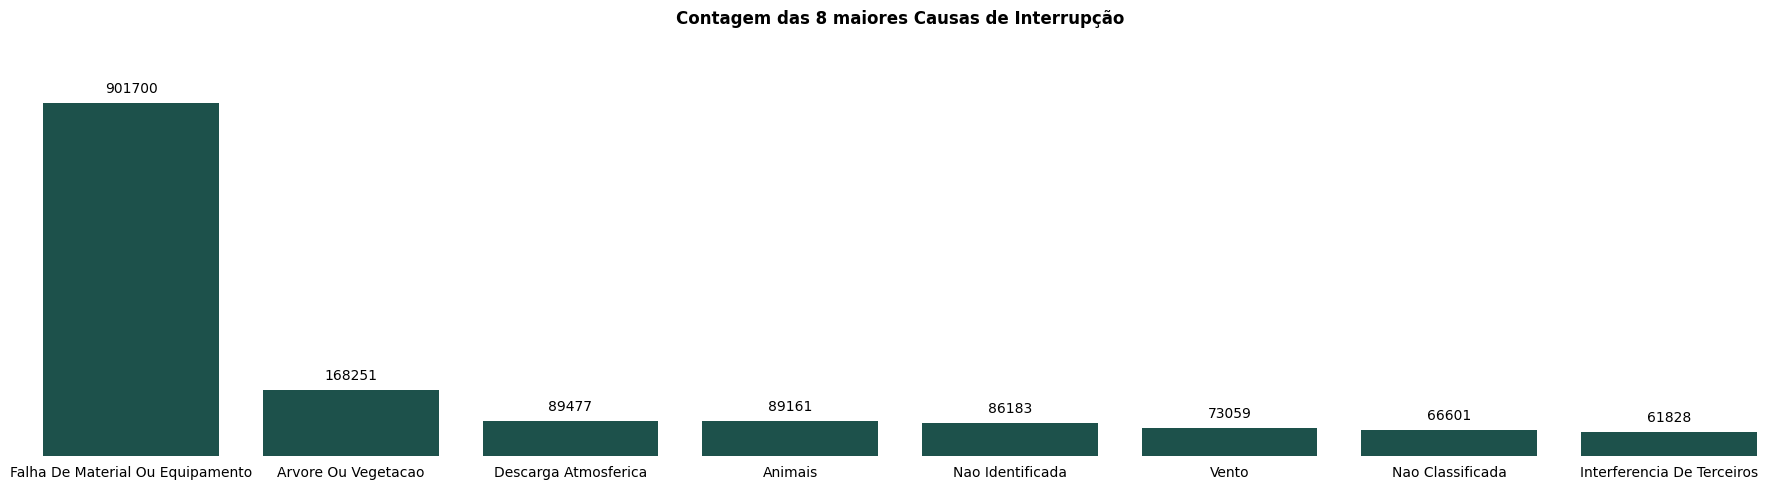

In [76]:
# Agrupando por causa e calculando a mediana 
mediana_causa = df_nordeste.groupby('Causa')[['Duracao','ConsumidoresAtingidos','CHI']].median()
mediana_causa = mediana_causa.reset_index()
# contando o numero de ocorrencias por causa
contagem_causa = df_nordeste['Causa'].value_counts().sort_values(ascending=False)
contagem_causa_df = contagem_causa.reset_index().head(8)
# criando a figura 
plt.figure(figsize=(18,5))
#criando o grafico de contagem por responsabilidade
grafico_causa_cont = sns.barplot(data = contagem_causa_df, x = 'Causa' , y = 'count',order = contagem_causa_df['Causa'],color = '#155952')
# colocando o rotulo 
rotulo_barra(grafico_causa_cont,0)
#chamando a costumização 
grafico_vertical(grafico_causa_cont,contagem_causa_df['count'],'Contagem das 8 maiores Causas de Interrupção')
plt.tight_layout()

Como podemos observar, das diversas causas de interrupção, as oito principais apresentam um padrão interessante e semelhante ao da responsabilidade. A causa mais frequente de interrupções no sistema elétrico de distribuição são as relacionadas à falha de material ou equipamentos. Isso se deve à complexidade e extensão da rede elétrica, sujeita a vários tipos de desgaste como efeito Joule, desgaste mecânico e outros aspectos relacionados à sua estrutura física ao longo do tempo.

Outra causa significativa no sistema de distribuição são as interrupções causadas por árvores ou vegetação. A queda de materiais vegetais na rede é uma fonte comum de danos, especialmente devido à natureza aérea da infraestrutura elétrica, que frequentemente entra em contato com árvores e vegetação.

Além disso, as descargas atmosféricas representam outra causa relevante de interrupções na rede de distribuição. Eventos climáticos que incluem raios podem causar danos substanciais aos equipamentos e à infraestrutura elétrica, resultando em interrupções significativas no fornecimento de energia.

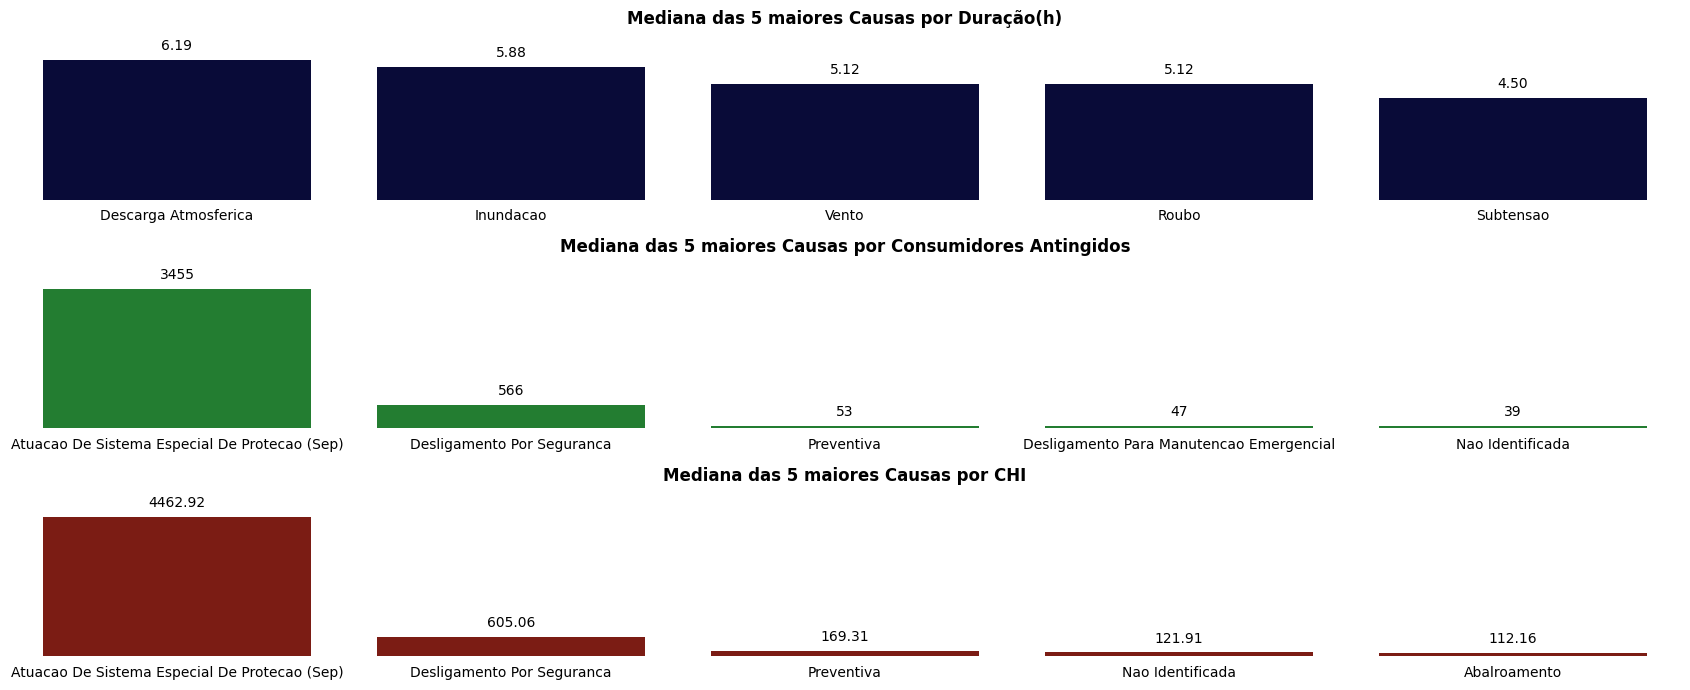

In [83]:
#criando a figura 
fig,ax = plt.subplots(3,1,figsize=(17,7))

# Ordenando mediana_resp pelo valor da mediana da 'Duracao'
mediana_causa_duracao = mediana_causa.sort_values(by='Duracao', ascending=False).head(5)
#criando o grafico da mediana por duracao para tipo
grafico_mediana_duracao_causa = sns.barplot(data = mediana_causa_duracao, x = 'Causa', y= 'Duracao',ax = ax[0],order = mediana_causa_duracao['Causa'],color = '#010440')
#colocando o rotulo de grafico 
rotulo_barra(grafico_mediana_duracao_causa,2)
# colocando a costumização do grafico
grafico_vertical(grafico_mediana_duracao_causa,mediana_causa_duracao['Duracao'], 'Mediana das 5 maiores Causas por Duração(h)')

# Ordenando mediana_resp pelo valor da mediana da 'ConsumidoresAtingidos'
mediana_causa_cons = mediana_causa.sort_values(by='ConsumidoresAtingidos', ascending=False).head(5)
#criando o grafico da media por duração 
grafico_mediana_cons_causa = sns.barplot(data = mediana_causa_cons, x = 'Causa', y= 'ConsumidoresAtingidos',ax = ax[1], order = mediana_causa_cons['Causa'],color = '#148C26')
#colocando o rotulo de grafico 
rotulo_barra(grafico_mediana_cons_causa,0)
# colocando a costumização do grafico
grafico_vertical(grafico_mediana_cons_causa,mediana_causa_cons['ConsumidoresAtingidos'], 'Mediana das 5 maiores Causas por Consumidores Antingidos')

# Ordenando mediana_resp pelo valor da mediana da 'CHI'
mediana_causa_chi = mediana_causa.sort_values(by='CHI', ascending=False).head(5)
#criando o grafico da media por duração 
grafico_mediana_chi_causa = sns.barplot(data = mediana_causa_chi, x = 'Causa', y= 'CHI',ax = ax[2], order = mediana_causa_chi['Causa'],color = '#8C0E03')
#colocando o rotulo de grafico 
rotulo_barra(grafico_mediana_chi_causa,2)
# colocando a costumização do grafico
grafico_vertical(grafico_mediana_chi_causa,mediana_causa_chi['CHI'], 'Mediana das 5 maiores Causas por CHI')

plt.tight_layout()


Ao analisar as medianas relacionadas às diferentes causas de interrupção, observamos um top 5 que difere significativamente em relação à contagem das ocorrências. Em termos de duração, a causa com maior mediana é relacionada às descargas atmosféricas, seguida por inundação, vento, roubo e subtensão. Notavelmente, as duas principais causas em termos de volume de ocorrências, falha de equipamento e quedas de árvores/vegetação, não estão entre as cinco com maior duração, indicando que, embora comuns, não são necessariamente as mais graves em termos de tempo de interrupção.

Por outro lado, ao considerar o número de consumidores afetados e o CHI (Clientes-Hora Interrompidos), observamos que a "Atuação do Sistema Especial de Proteção (SEP)" se destaca como a principal causa. Isso é amplamente influenciado pelo apagão ocorrido em 15 de agosto, que impactou todo o sistema de distribuição no Nordeste. O "Desligamento por Segurança" também figura entre as principais causas, sendo frequentemente resultado de outras condições que afetam a rede elétrica.

Essa análise destaca a importância de estratégias específicas de mitigação e de resposta rápida para diferentes tipos de causas de interrupção, visando reduzir tanto a duração das interrupções quanto o número de clientes afetados.


#### 6.3.6 Turno

Nossa última análise com relação a fatores relacionados à interrupção é analisando o turno que se iniciam as ocorrências queremos saber se há um turno onde as ocorrências são mais frequentes ou que duram mais, ou afetam mais clientes.

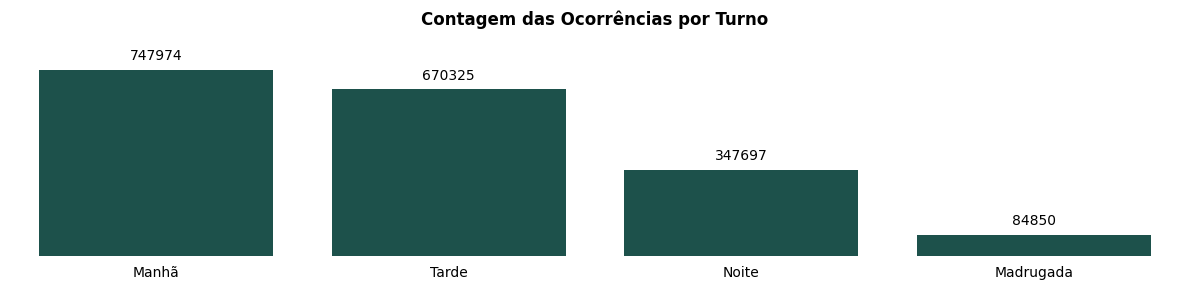

In [78]:
# Agrupando por origem e calculando a mediana
mediana_turno = df_nordeste.groupby('Turno')[['Duracao','ConsumidoresAtingidos','CHI']].median()
mediana_turno = mediana_turno.reset_index()
# contando o numero de ocorrencias por origem
contagem_turno = df_nordeste['Turno'].value_counts().sort_values(ascending=False)
contagem_turno_df = contagem_turno.reset_index()
# criando a figura 
plt.figure(figsize=(12,3))
#criando o grafico de contagem por turno
grafico_turno_cont = sns.barplot(data = contagem_turno_df, x = 'Turno' , y = 'count',order = contagem_turno_df['Turno'],color= '#155952')
# colocando o rotulo 
rotulo_barra(grafico_turno_cont,0)
#chamando a costumização 
grafico_vertical(grafico_turno_cont,contagem_turno_df['count'],'Contagem das Ocorrências por Turno')
plt.tight_layout()

Podemos observar que as ocorrências de interrupções de energia são mais comuns no turno da manhã, seguidas pelo turno da tarde, enquanto que os turnos da noite e madrugada apresentam um número significativamente menor de ocorrências. Uma possível explicação para esse comportamento é que durante a manhã e a tarde, a população está acordada e utilizando ativamente energia elétrica, percebendo mais facilmente qualquer interrupção. Já nos turnos da noite e madrugada, devido ao comportamento usual da população, as falhas de energia podem passar despercebidas até a manhã seguinte, quando então os consumidores entram em contato com a distribuidora para solicitar reparos. Isso resulta em um registro das interrupções na base de dados predominantemente durante os turnos da manhã e tarde, explicando a grande diferença no número de ocorrências entre os períodos.

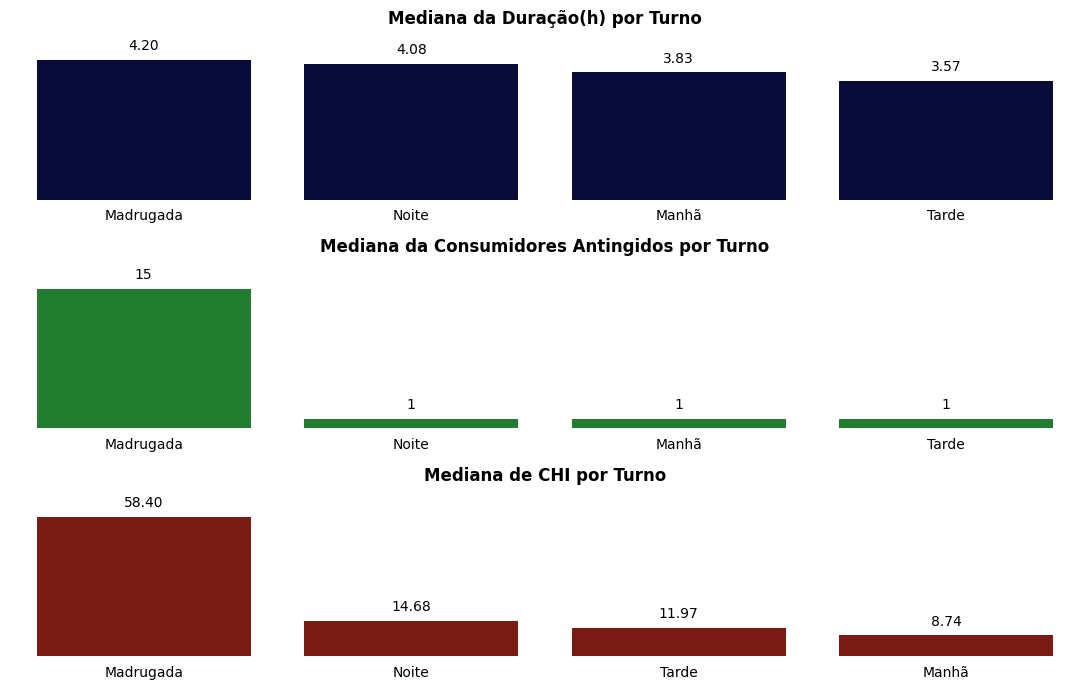

In [79]:
#criando a figura 
fig,ax = plt.subplots(3,1,figsize=(11,7))


# Ordenando mediana_turno pelo valor da mediana da 'Duracao'
mediana_turno = mediana_turno.sort_values(by='Duracao', ascending=False)
#criando o grafico da mediana por duracao para tipo
grafico_mediana_duracao_turno = sns.barplot(data = mediana_turno, x = 'Turno', y= 'Duracao',ax = ax[0],order = mediana_turno['Turno'],color = '#010440')
#colocando o rotulo de grafico 
rotulo_barra(grafico_mediana_duracao_turno,2)
# colocando a costumização do grafico
grafico_vertical(grafico_mediana_duracao_turno,mediana_turno['Duracao'], 'Mediana da Duração(h) por Turno')


# Ordenando mediana_turno pelo valor da mediana da 'ConsumidoresAtingidos'
mediana_turno = mediana_turno.sort_values(by='ConsumidoresAtingidos', ascending=False)
#criando o grafico da media por duração 
grafico_mediana_cons_turno = sns.barplot(data = mediana_turno, x = 'Turno', y= 'ConsumidoresAtingidos',ax = ax[1],order = mediana_turno['Turno'],color = '#148C26')
#colocando o rotulo de grafico 
rotulo_barra(grafico_mediana_cons_turno,0)
# colocando a costumização do grafico
grafico_vertical(grafico_mediana_cons_turno,mediana_turno['ConsumidoresAtingidos'], 'Mediana da Consumidores Antingidos por Turno')

# Ordenando mediana_turno pelo valor da mediana da 'CHI'
mediana_turno = mediana_turno.sort_values(by='CHI', ascending=False)
#criando o grafico da media por duração 
grafico_mediana_chi_turno = sns.barplot(data = mediana_turno, x = 'Turno', y= 'CHI',ax = ax[2],order = mediana_turno['Turno'],color = '#8C0E03')
#colocando o rotulo de grafico 
rotulo_barra(grafico_mediana_chi_turno,2)
# colocando a costumização do grafico
grafico_vertical(grafico_mediana_chi_turno,mediana_turno['CHI'], 'Mediana de CHI por Turno')

plt.tight_layout()

Por outro lado, ao analisarmos a relação entre os turnos e os fatores de duração das interrupções, número de consumidores atingidos e CHI, observamos um cenário oposto em comparação à quantidade de ocorrências. Durante o turno da madrugada, tanto a duração das interrupções quanto o número de consumidores afetados apresentam medianas significativamente maiores, resultando em um CHI consequentemente mais elevado. Um aspecto notável é a mediana do número de clientes interrompidos, que durante a madrugada é aproximadamente 15 vezes maior do que nos outros turnos.

Esse fenômeno pode ser explicado por alguns fatores. Durante a madrugada, o número de equipes disponíveis pelas distribuidoras é geralmente menor em comparação aos turnos diurnos. A ausência de iluminação natural e o horário noturno também tornam o trabalho de reparo mais desafiador, contribuindo para tempos de resposta e resolução mais longos. Esses fatores combinados explicam por que as interrupções durante a madrugada tendem a ser mais extensas e a afetar um maior número de consumidores.

## 7. Conclusão 

A análise das interrupções na rede de distribuição de energia elétrica no Nordeste brasileiro em 2023 revelou insights importantes sobre os principais desafios e áreas de melhoria para garantir um serviço elétrico mais confiável e eficiente na região. Atraves dos dados conseguimos descobrir que :

- **Análise das Variaveis quantitativas**
    - Duração:

        - A média é relativamente alta em comparação com a mediana, sugerindo a presença de eventos de longa duração que influenciam significativamente a média.
        - A dispersão ampla dos dados indica que há uma variedade de eventos, desde curtos até muito longos.

    - Consumidores Atingidos:

        - A média é muito maior que a mediana, indicando que algumas interrupções afetam um número significativo de consumidores.
        - A presença de um valor máximo alto (103.581 consumidores afetados) destaca o impacto considerável de eventos de alta magnitude nesse indicador.

    - CHI (Clientes-Hora Interrompidos):

        - A diferença entre a média e o desvio padrão sugere a presença de outliers que exercem uma influência significativa no CHI.
        - Os outliers podem representar eventos graves ou incomuns que demandam atenção especial durante a análise.
        - O pico observado em agosto foi causado por eventos de alívio de carga em 15 de agosto, impactando significativamente a média de consumidores afetados.


- **Comportamento ao Longo dos Meses**
    - O número de ocorrências ao longo de 2023 não é uniforme, variando significativamente de mês a mês.
    - A análise sazonal mostra que o verão e o outono tendem a ter mais interrupções, enquanto o inverno apresenta o menor número.
    - A correlação entre as interrupções e o volume de chuva mensal é moderada a alta, indicando que períodos chuvosos estão associados a mais interrupções.

- **Análise dos Fatores Geradores da Interrupção**
    - Origem: A maioria das interrupções é de origem interna, destacando a necessidade de melhorias e manutenção dentro do sistema de distribuição.
    - Tipo: A grande maioria das interrupções é não programada, o que implica em eventos inesperados e não planejados.
    - Responsabilidade: As ocorrências próprias do sistema e relacionadas ao meio ambiente são predominantes, exigindo medidas preventivas para minimizar seu impacto.
    - Causa: Uma ampla gama de motivos contribui para as interrupções, cada um exigindo uma estratégia específica para mitigação.


Entre os principais insights obtidos estão:

- **Impacto das Condições Climáticas**: As condições climáticas adversas, como tempestades e ventos fortes, foram responsáveis por uma parte significativa das interrupções. Investimentos em infraestrutura resiliente e sistemas de monitoramento avançados podem ajudar a mitigar esses impactos.

- **Manutenção Preventiva**: A falta de manutenção preventiva em alguns trechos da rede contribuiu para o aumento das interrupções. Estratégias proativas de manutenção, incluindo inspeções regulares e atualizações de equipamentos, são essenciais para reduzir falhas não programadas.

- **Capacidade de Resposta**: A capacidade de resposta rápida das equipes de manutenção foi fundamental para minimizar o tempo de indisponibilidade do serviço. Investimentos em treinamento e tecnologia para melhorar a eficiência das equipes podem resultar em tempos de reparo mais rápidos e menor impacto para os consumidores.

- **Monitoramento e Análise de Dados**: A utilização de sistemas avançados de monitoramento e análise de dados pode proporcionar insights em tempo real sobre o estado da rede, permitindo a identificação precoce de potenciais pontos de falha e a implementação de medidas corretivas proativas.

- **Engajamento com Stakeholders**: O envolvimento contínuo com os stakeholders, incluindo consumidores, órgãos reguladores e comunidades locais, é crucial para entender as necessidades específicas da região e implementar soluções personalizadas que promovam a resiliência do sistema elétrico.

### 8. Referências 


ABRADEE. Redes de Energia Elétrica. Associação Brasileira de Distribuidores de Energia
Elétrica (ABRADEE). Disponível em: <https://abradee.org.br/redes-de-energia-eletrica//>.
Acesso em: 18 jun. 2024.


ANEEL. Módulo 1 - Glossário de termos técnicos do prodist. Procedimentos de distribuição
de energia elétrica no sistema elétrico nacional – PRODIST, 2021. Disponível em: <
https://www2.aneel.gov.br/cedoc/aren2021956_2.pdf>. Acesso em: 15 jun 2024.

ANEEL. Módulo 8 - Qualidade do fornecimento de energia elétrica. Procedimentos de
distribuição de energia elétrica no sistema elétrico nacional – PRODIST, 2021.
Disponível em: < https://www2.aneel.gov.br/cedoc/aren2021956_2.pdf>. Acesso em: 15 jun
2024.

ANEEL Interrupções de Energia Elétrica nas Redes de Distribuição, 2023. Disponível em:
< https://dadosabertos.aneel.gov.br/dataset/interrupcoes-de-energia-eletrica-nas-redes-dedistribuicao>. Acesso em: 15 jun 2024.

Instituto Nacional de Meteorologia (INMET). Banco de Dados Meteorológicos para Ensino e Pesquisa - BDMEP. Disponível em: https://bdmep.inmet.gov.br/. Acesso em: 15 jun 2024.


Operador Nacional do Sistema Elétrico (ONS). Ocorrência no SIN em 15/08/2023: energia restabelecida em todo o país. Disponível em: https://www.ons.org.br/Paginas/Noticias/20230815-OCORR%C3%8ANCIA-NO-SIN-EM-15-08-2023-ENERGIA-RESTABELECIDA-EM-TODO-O-PA%C3%8DS.aspx. Acesso em: 18 jun. 2024.

KAGAN, N.; OLIVEIRA, C. C. B. D.; ROBBA, E. J. Introdução aos sistemas de
distribuição de energia elétrica. 1ª. ed. São Paulo: Blucher, 2005. 328 p.




